In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as ex

In [47]:
data = pd.read_csv("data.csv")
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### Data Cleaning and Analysis

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [49]:
data.drop( columns = ["id", "Unnamed: 32"], inplace = True)

In [50]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [51]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

# Understanding Distribution Of Data

In [52]:
for col in data.columns:
    print(col, ":", data[col].unique())
    print()

diagnosis : ['M' 'B']

radius_mean : [17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.95  11.28   9.738 16.11  12.9   10.75  11.9   1

#  Categorical Columns 

In [53]:
# Diagonis : [M, B]

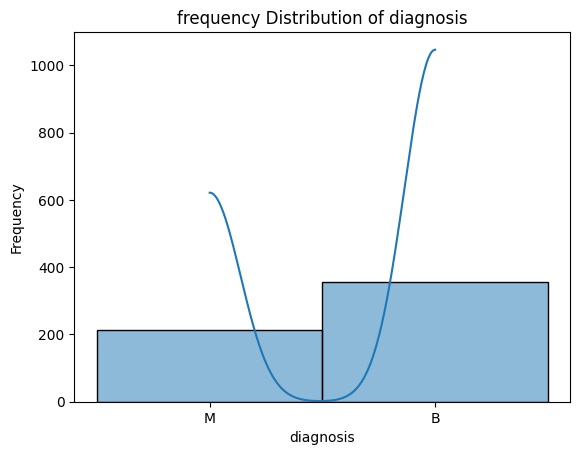

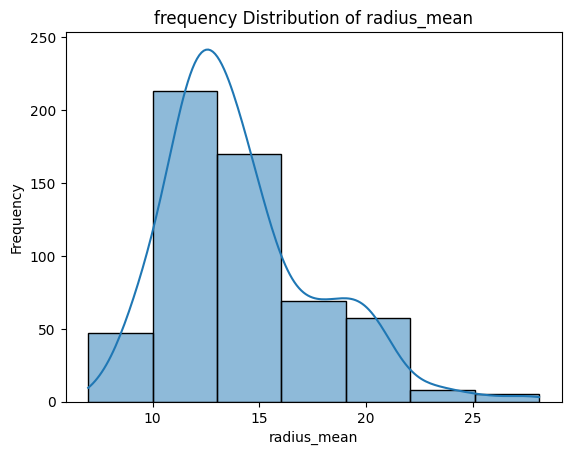

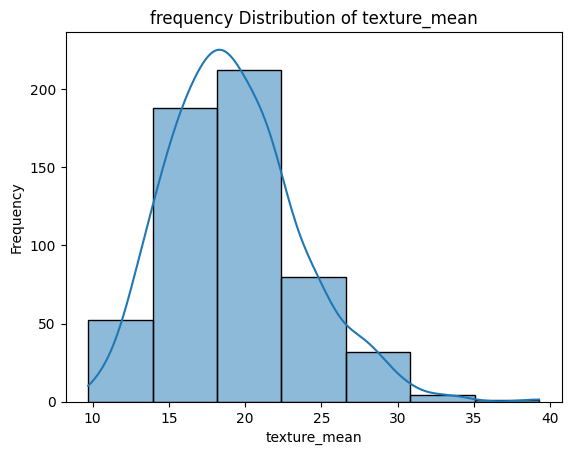

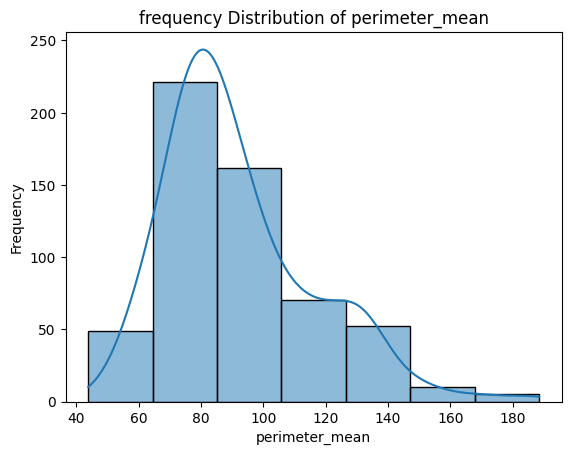

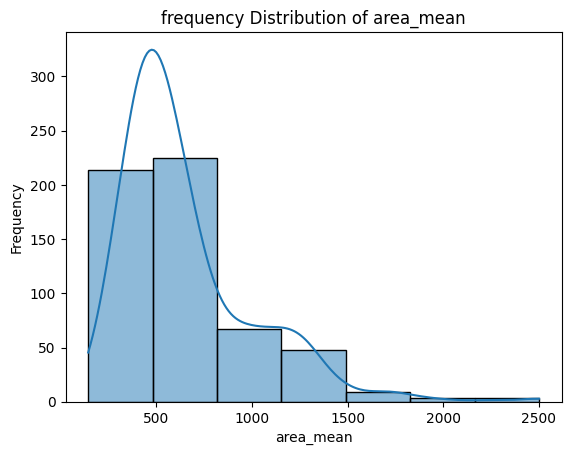

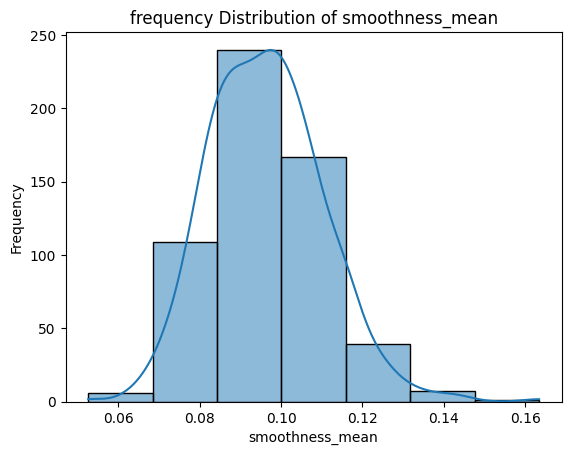

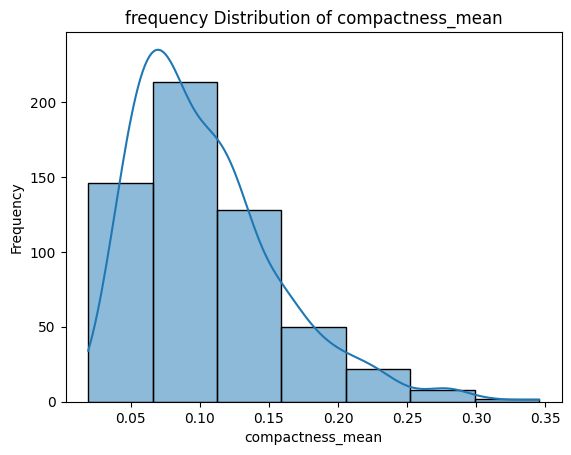

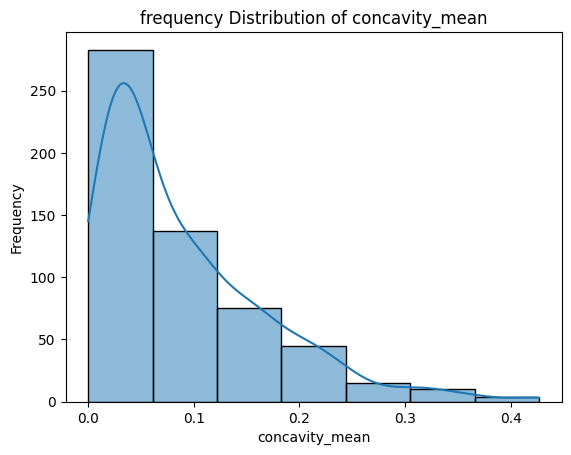

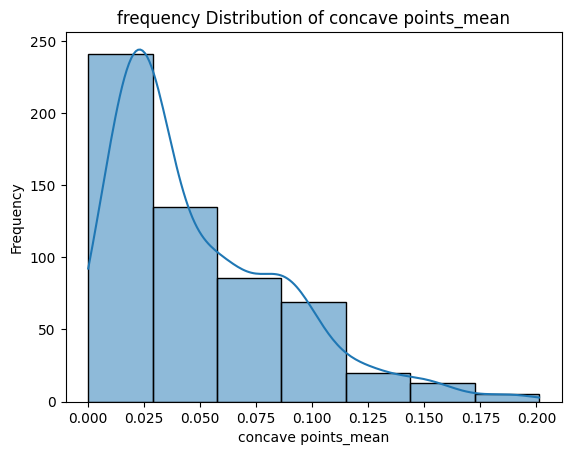

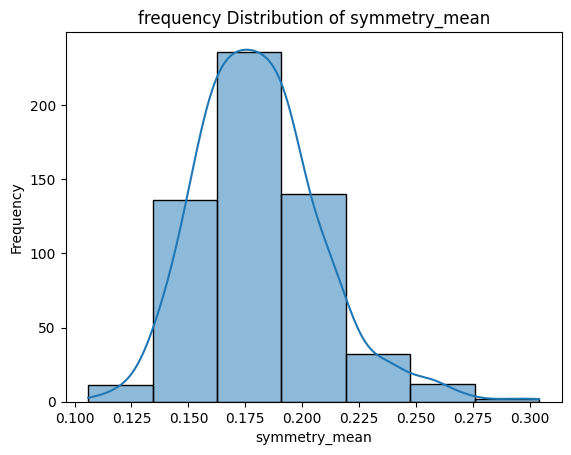

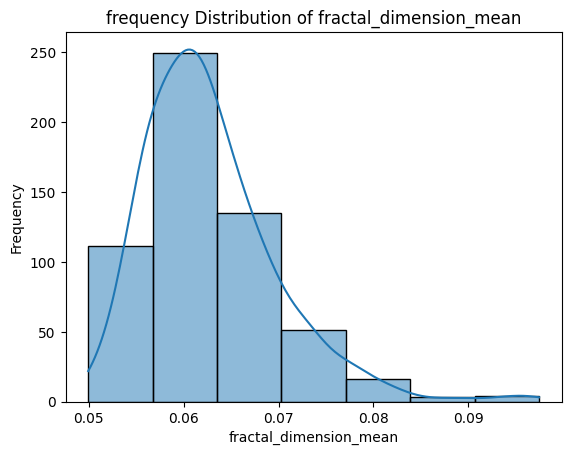

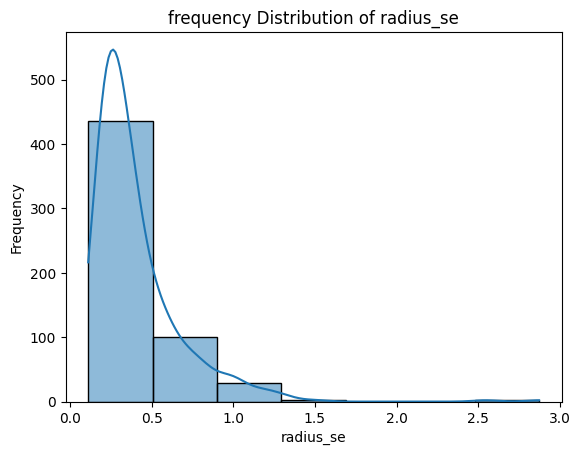

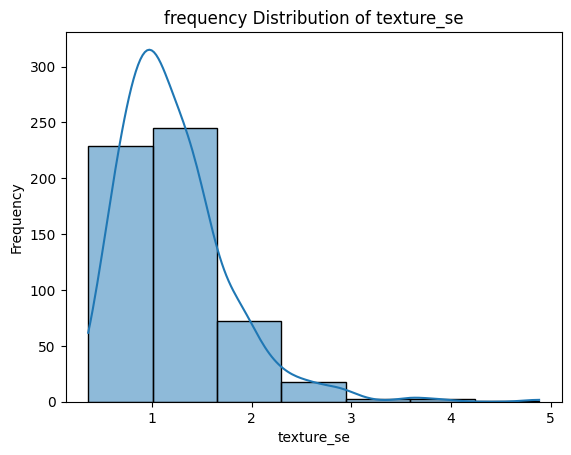

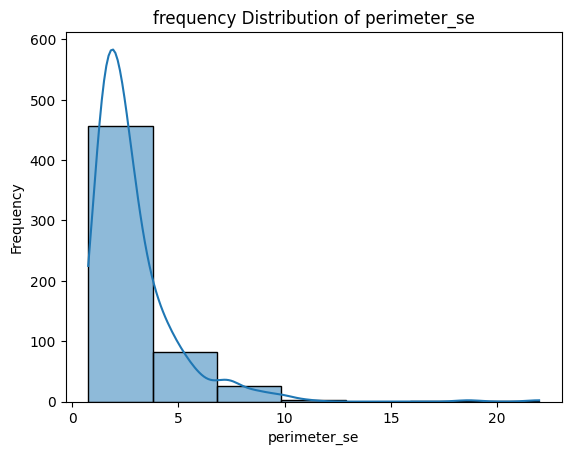

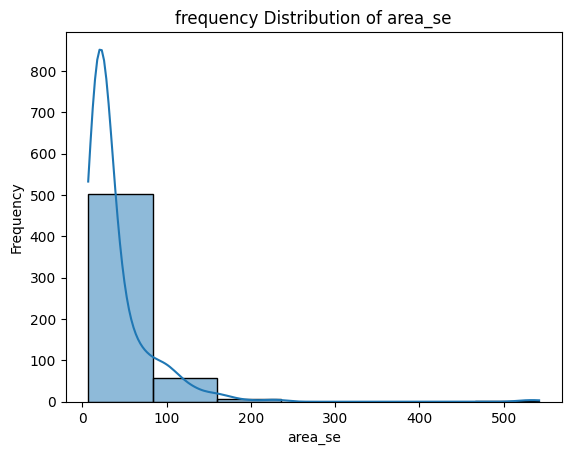

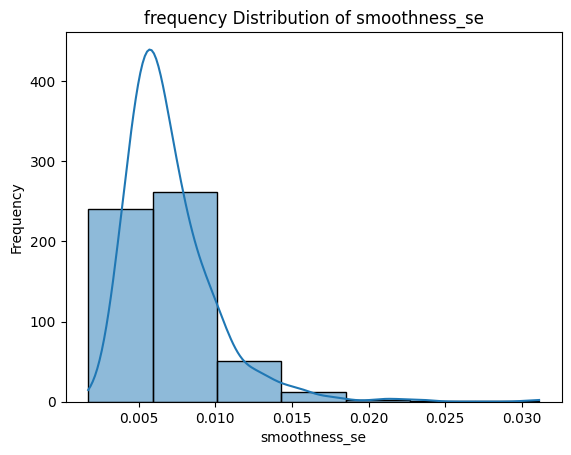

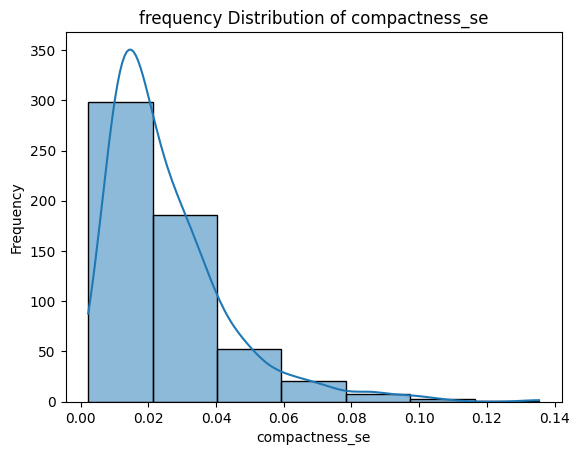

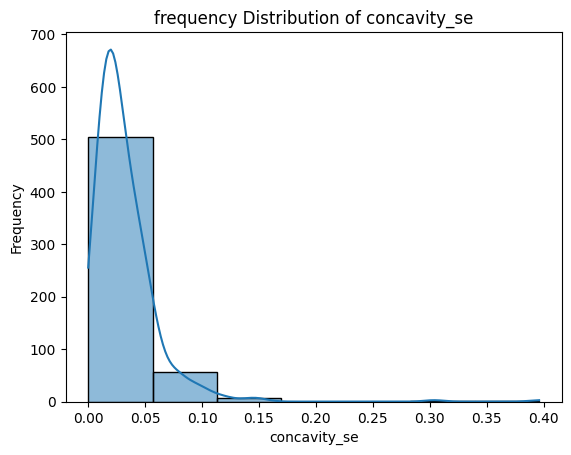

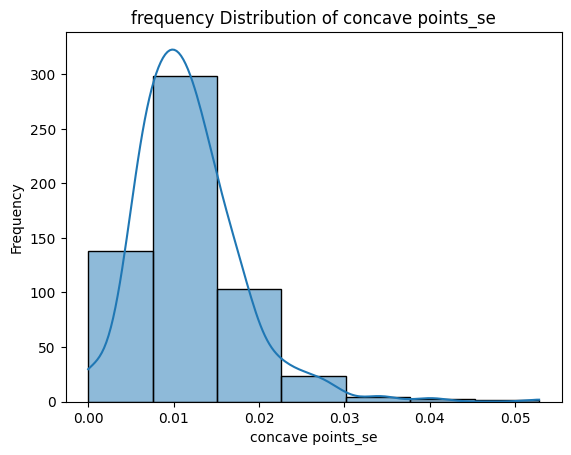

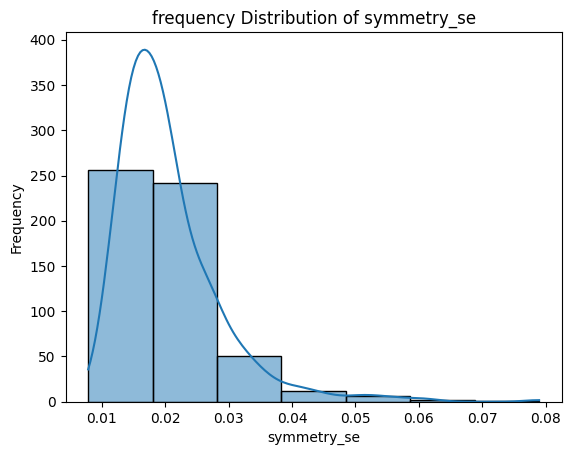

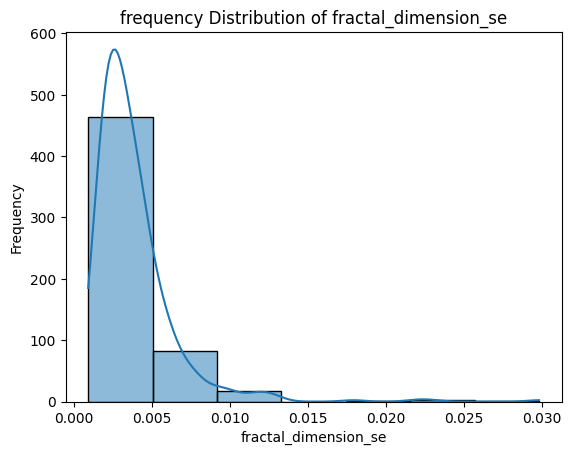

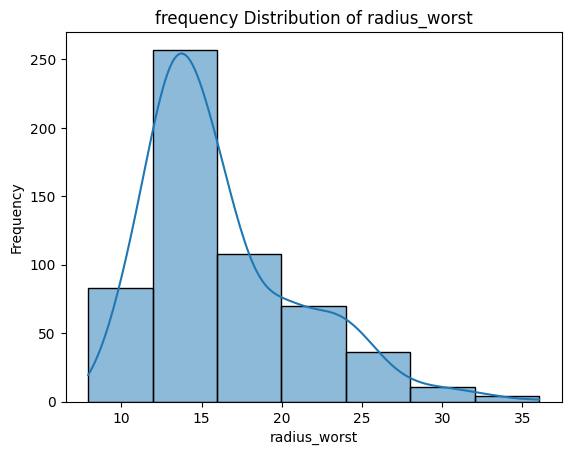

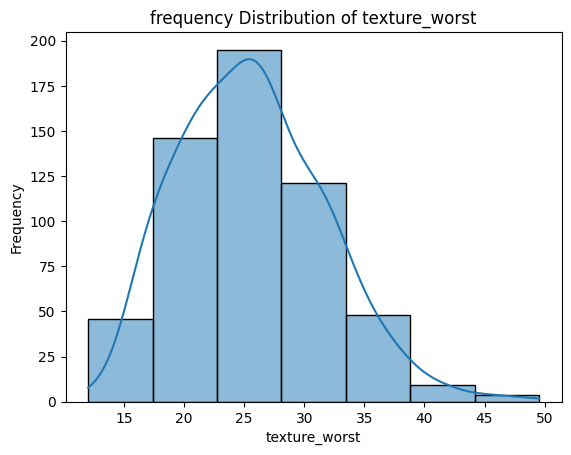

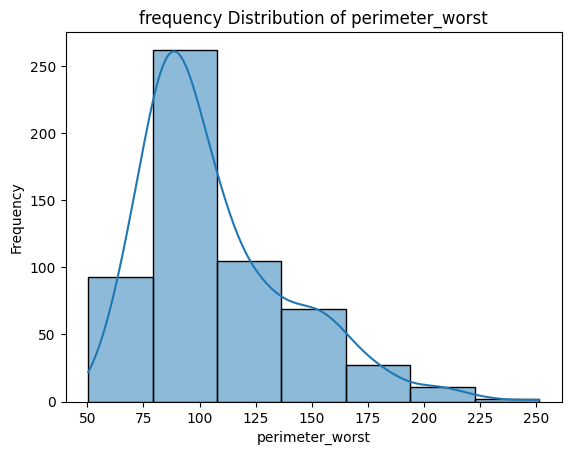

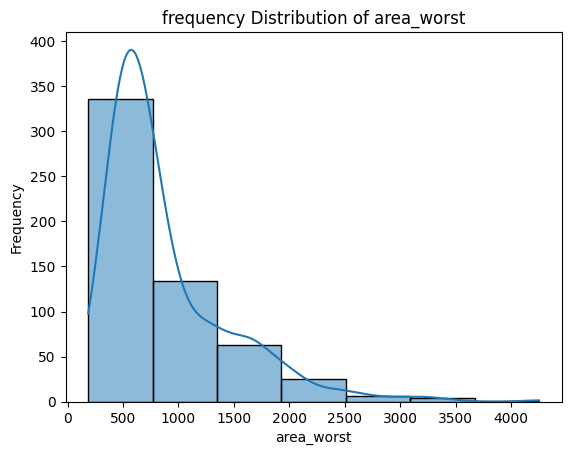

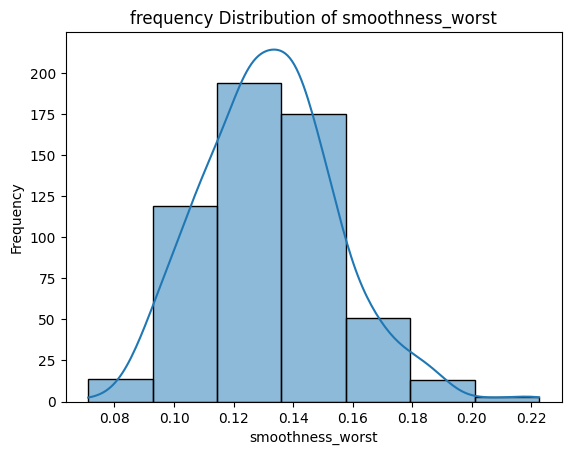

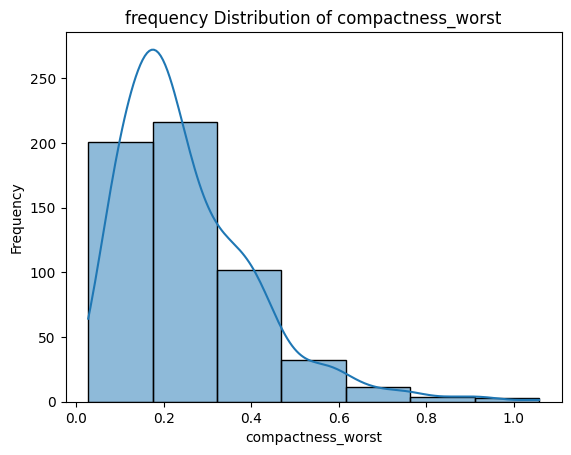

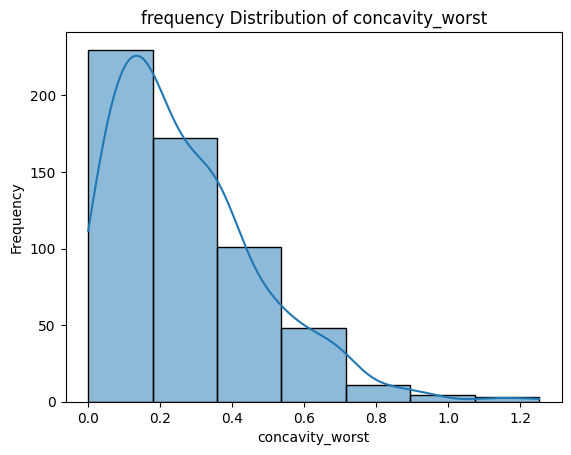

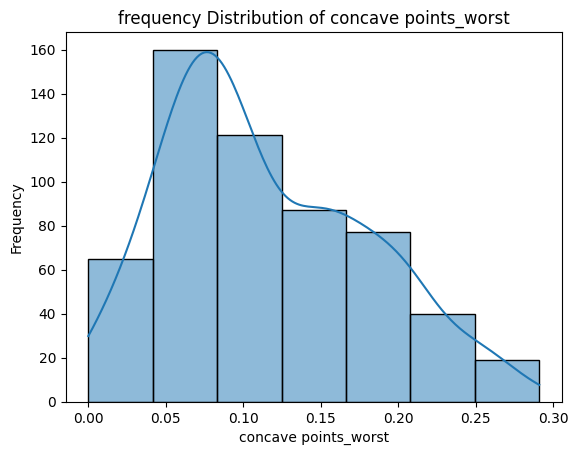

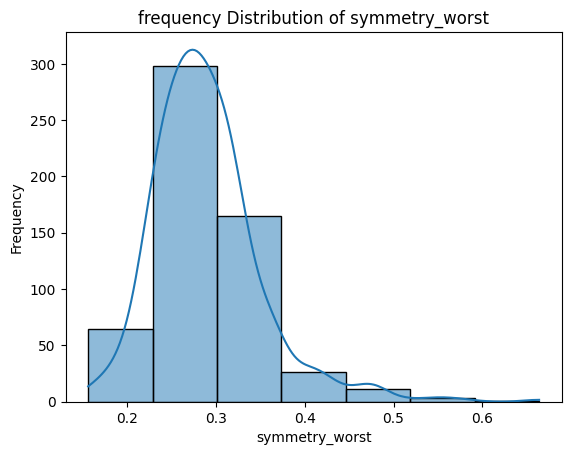

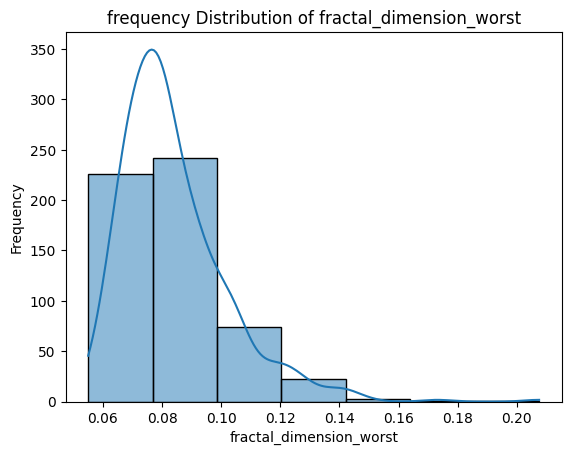

In [54]:
for coln in data.columns:
    sns.histplot(data[coln],kde = True , bins = 7)
    plt.title( f"frequency Distribution of {coln}")
    plt.xlabel(coln)
    plt.ylabel("Frequency")
    plt.show()

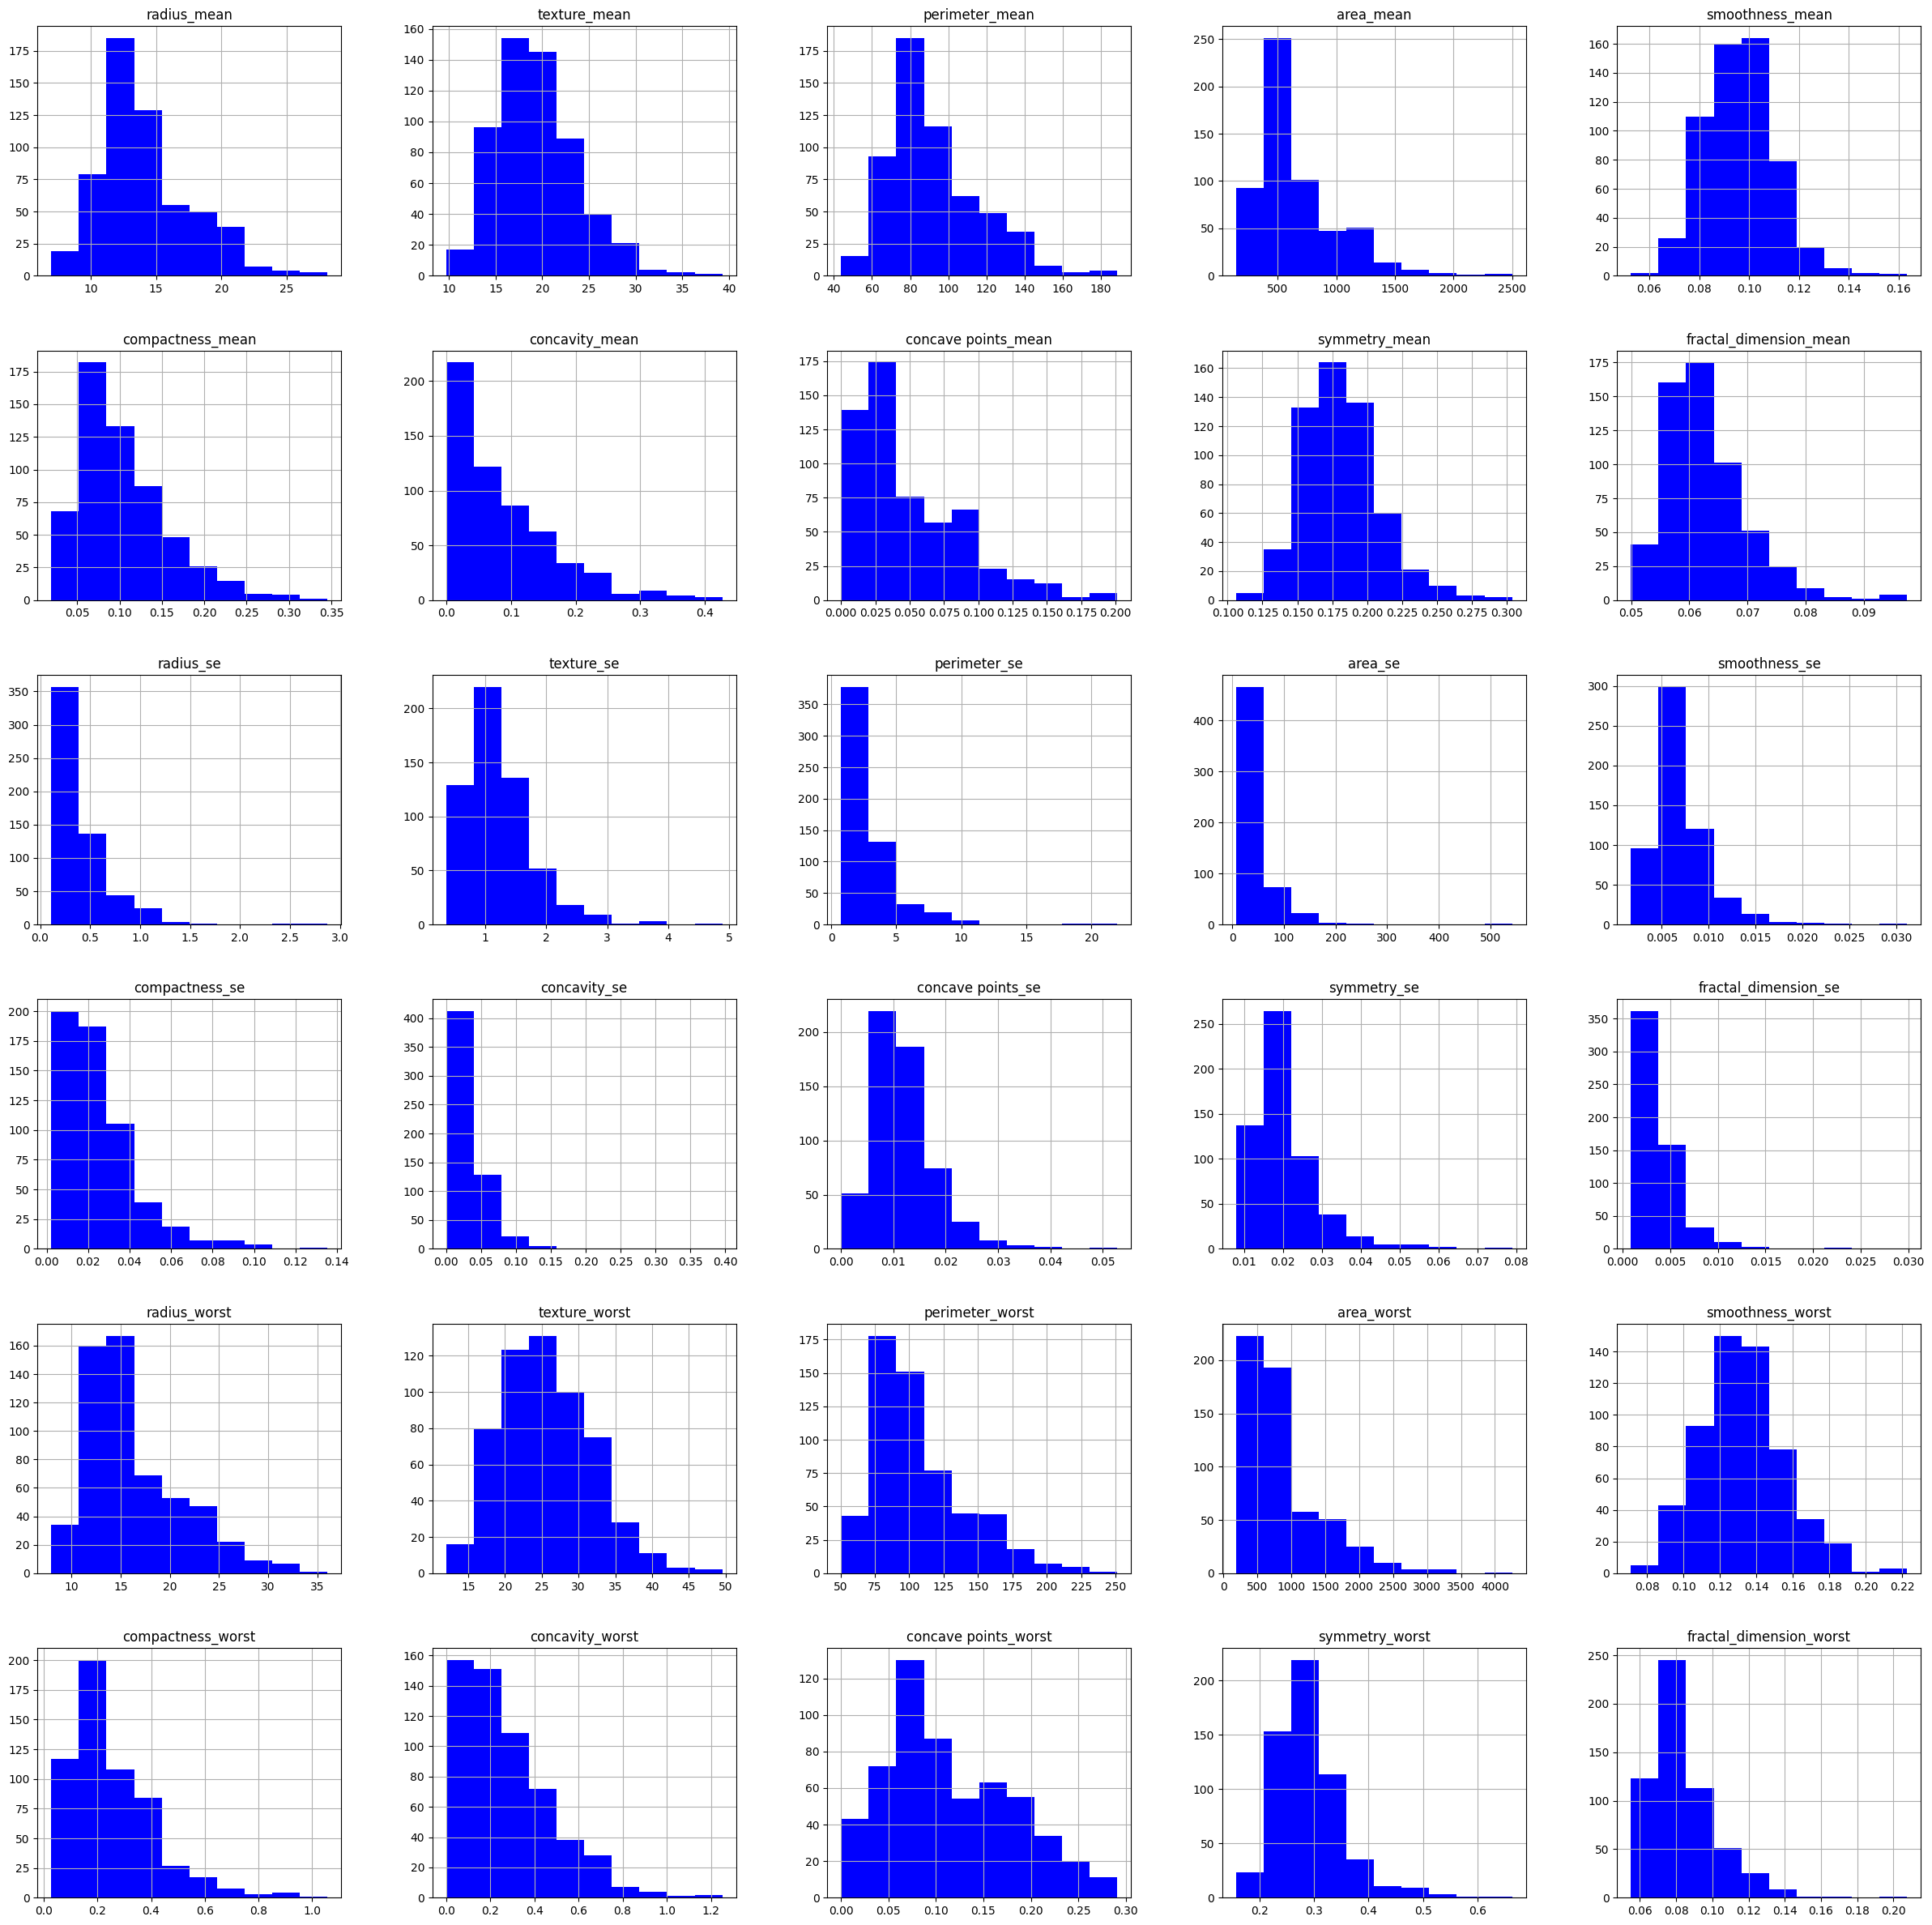

In [55]:
# VISUALIZING THE WHOLE DATAFRAME BY PLOTTING HISTOGRAM
data.hist(bins = 10, figsize = (30, 30), color = "blue")
plt.show()
          

#  Bar Plot For categorical Columns 

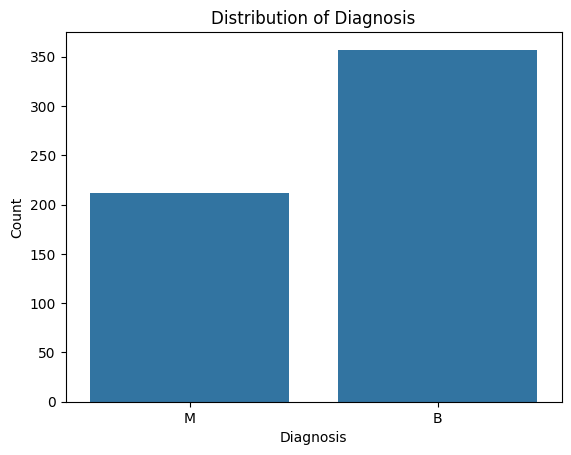

In [56]:
sns.countplot(x = data["diagnosis"], data = data)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# We plot pair plots for continuous variables ton visualize relationships between all continuous variables in the dataset, along with their distributions.

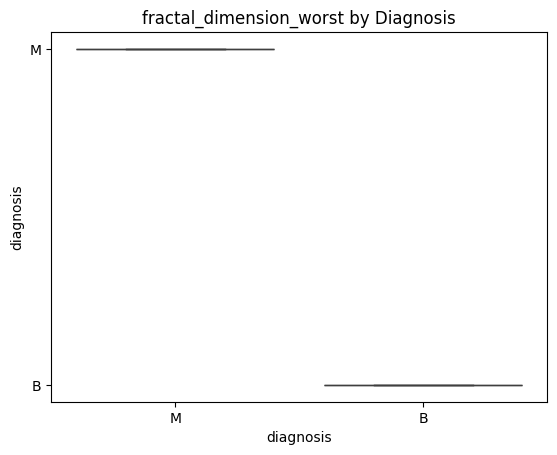

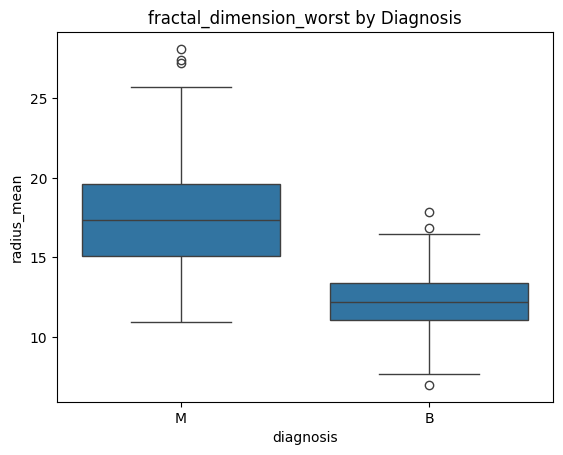

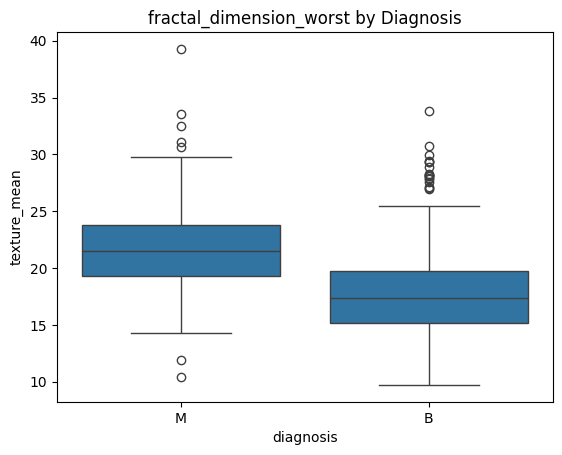

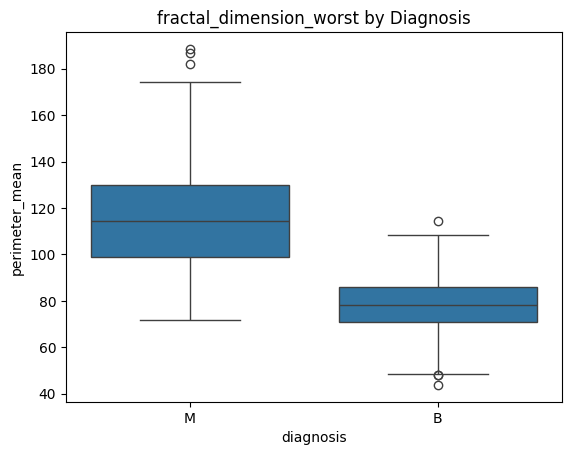

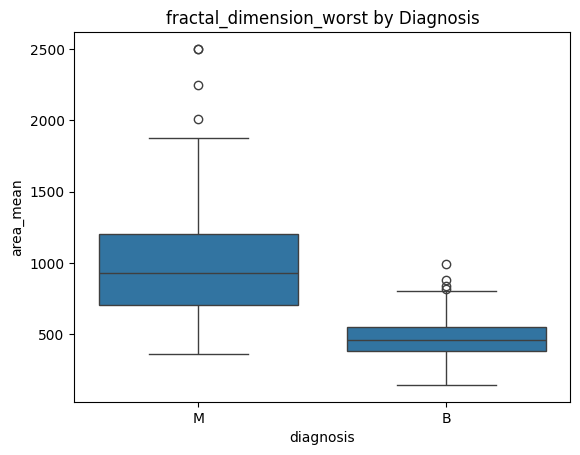

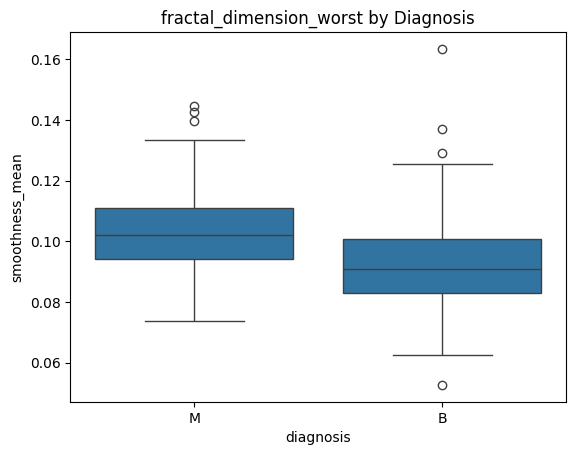

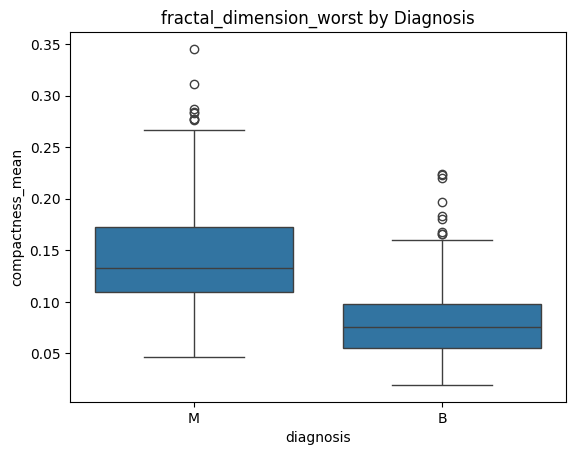

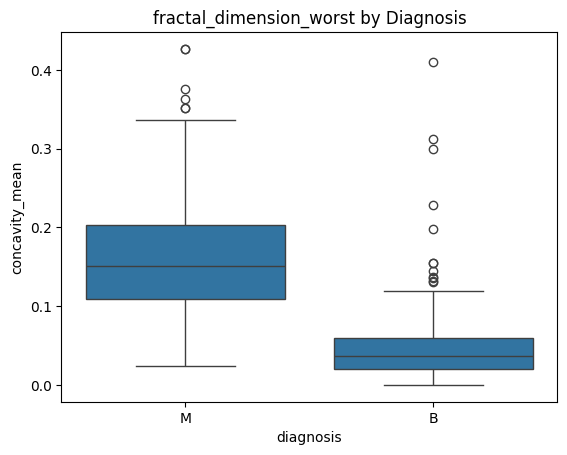

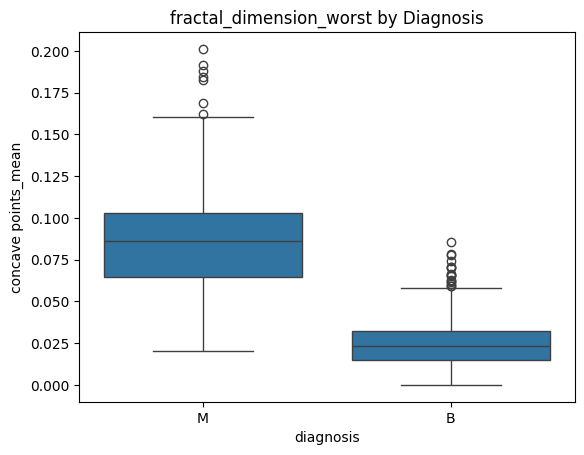

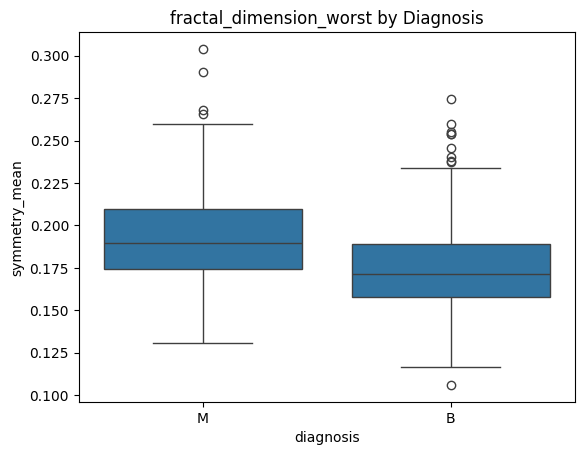

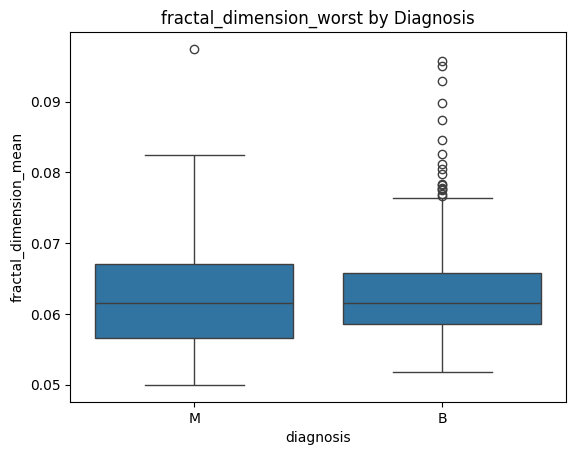

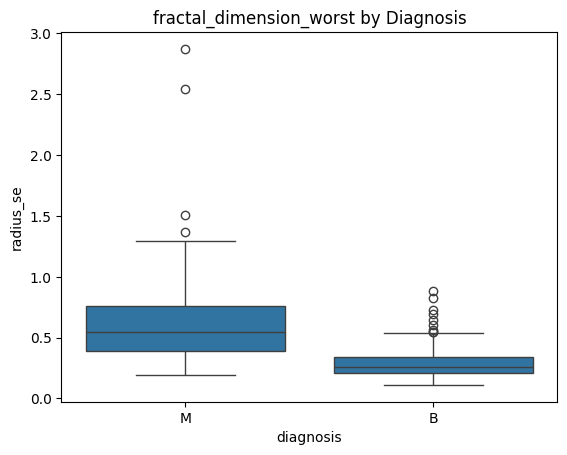

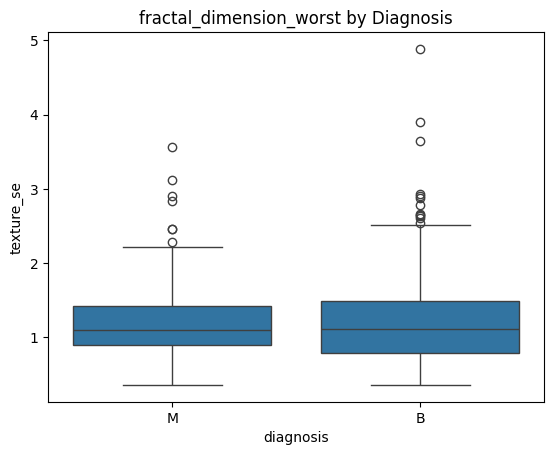

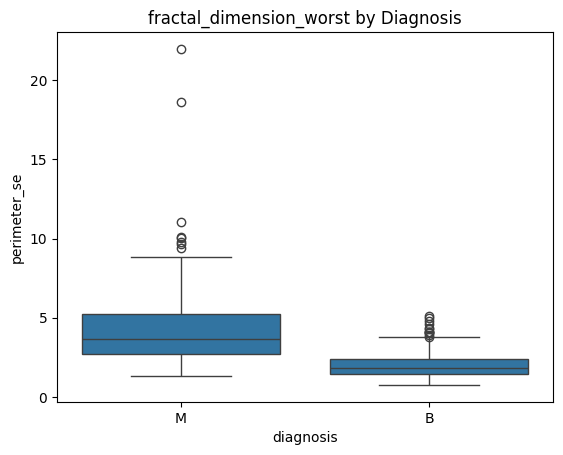

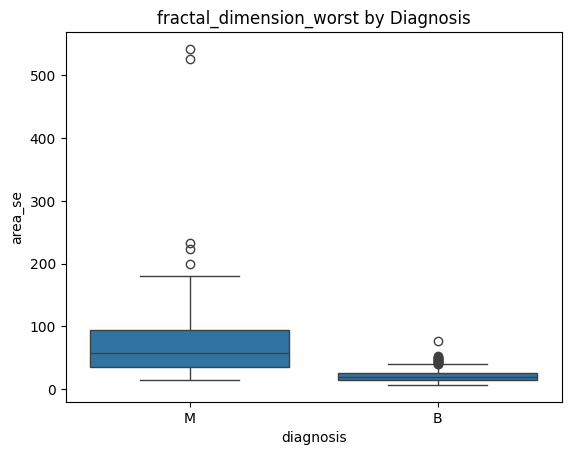

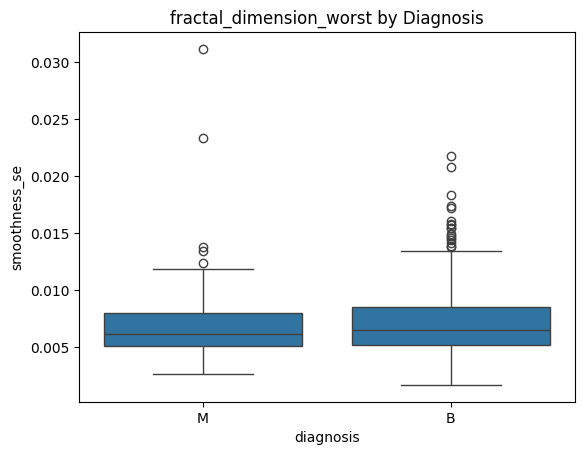

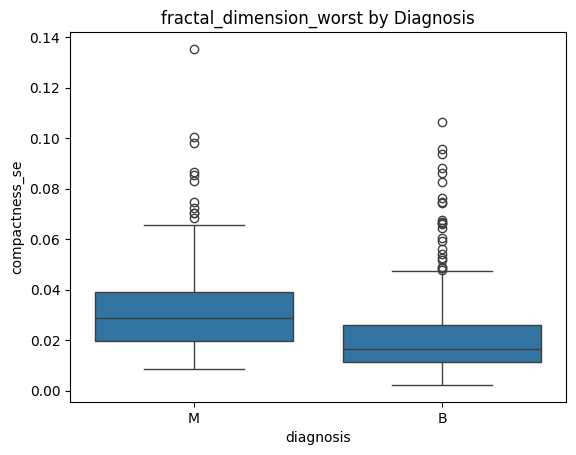

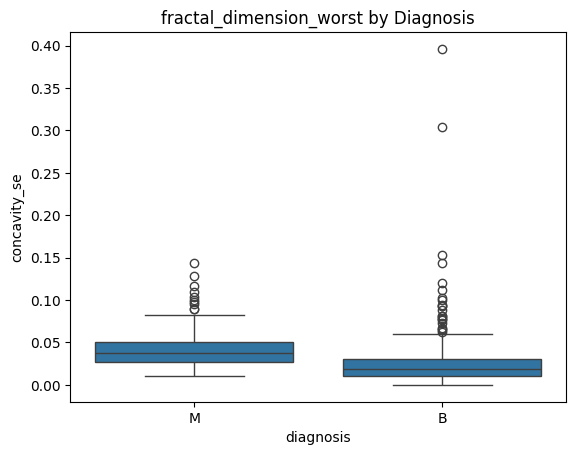

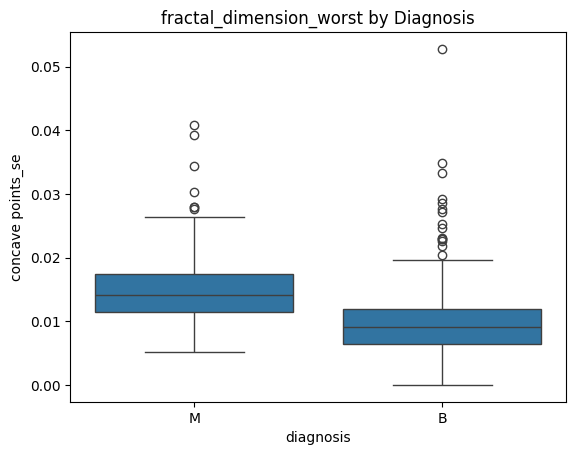

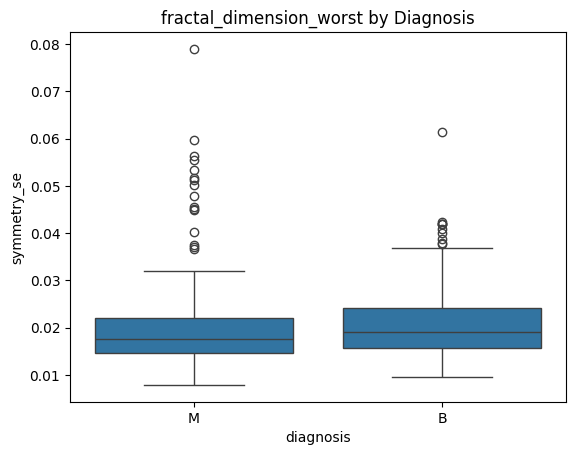

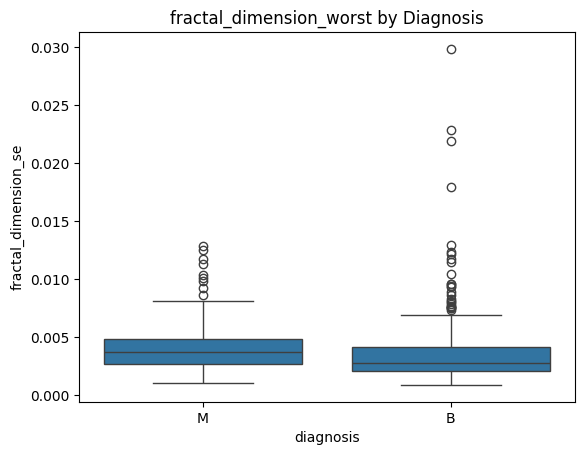

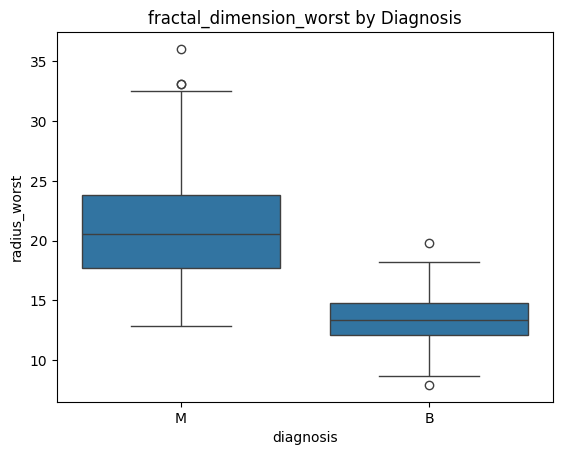

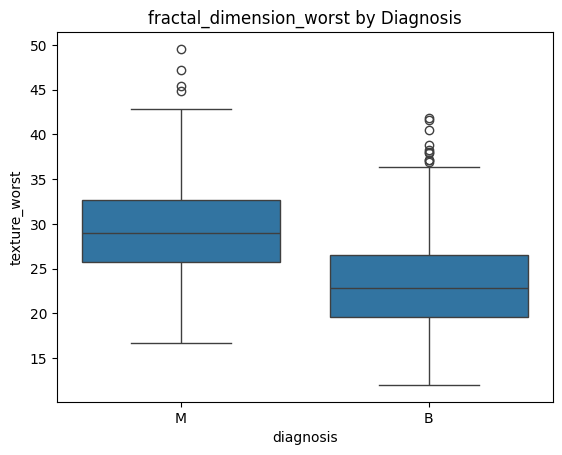

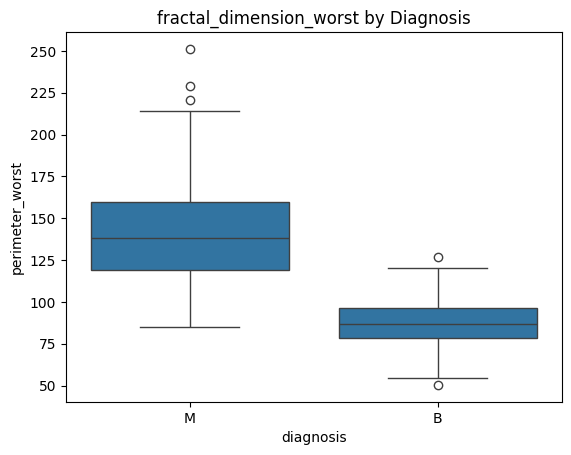

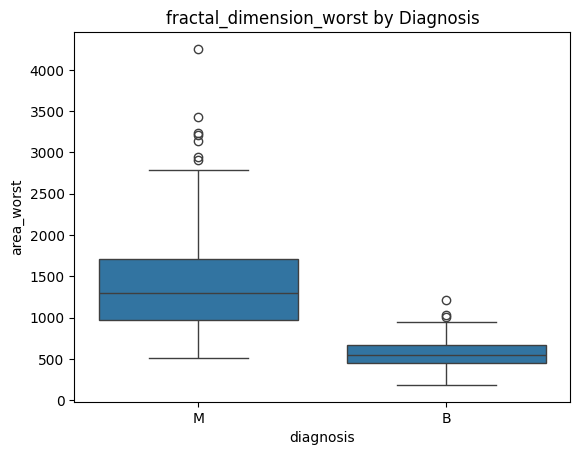

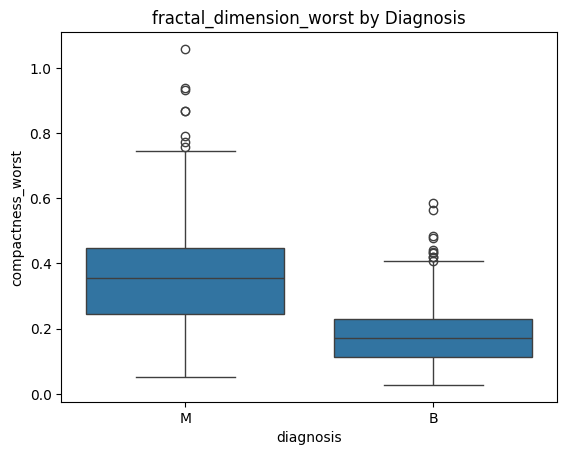

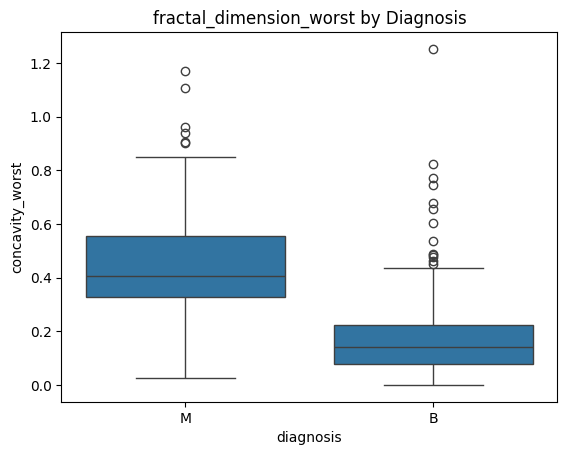

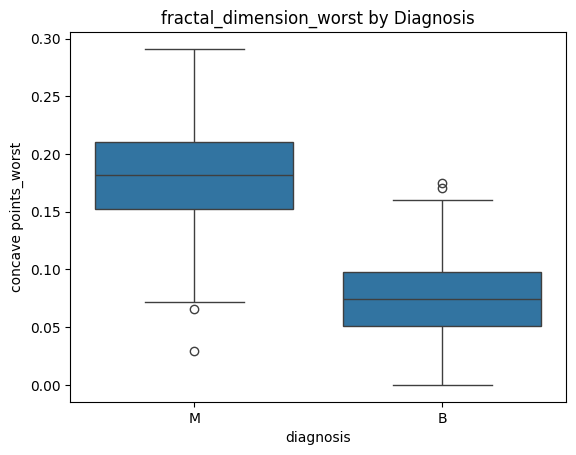

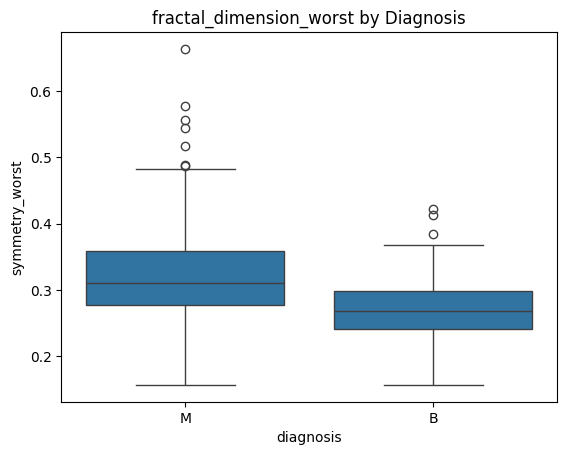

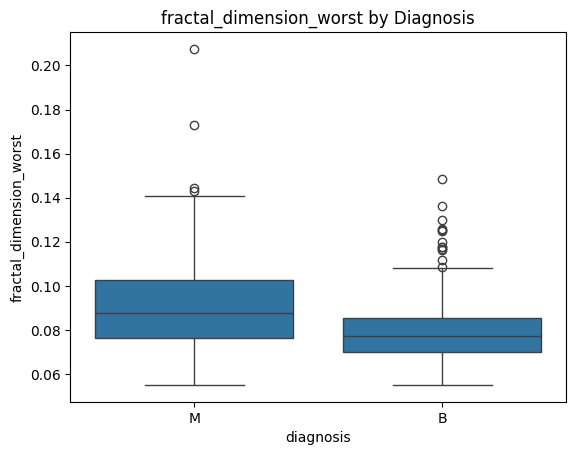

In [57]:
for col in data.columns:
    sns.boxplot( x = "diagnosis", y = col, data = data)
    plt.title(f"{coln} by Diagnosis")
    plt.show()

# Violin plot 

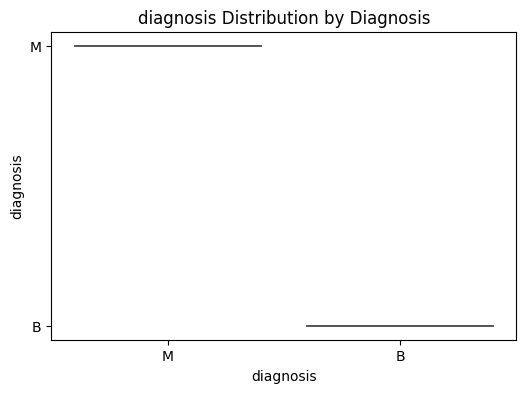

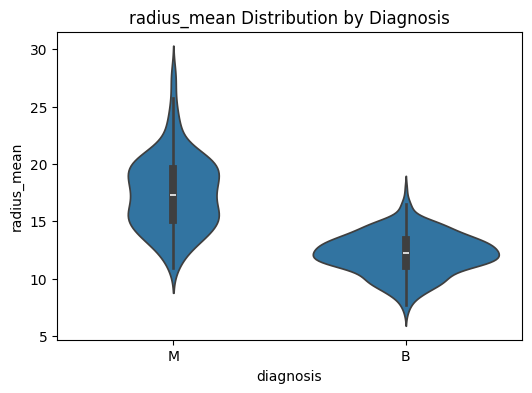

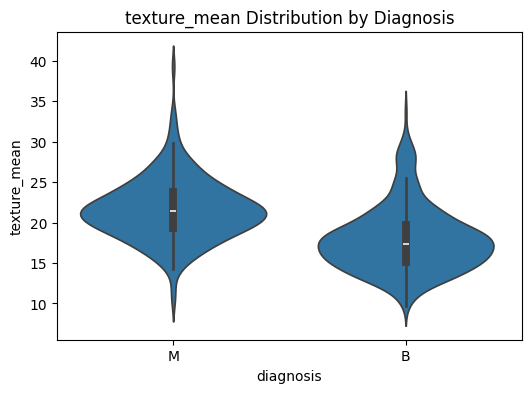

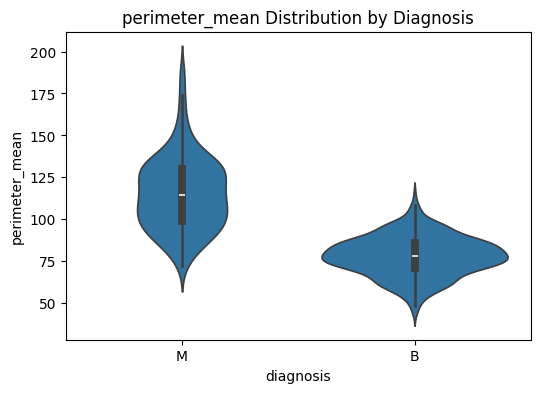

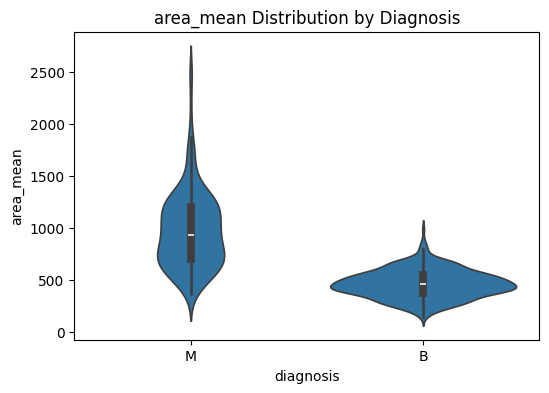

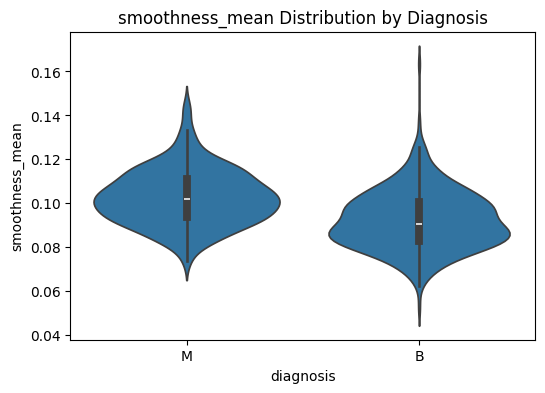

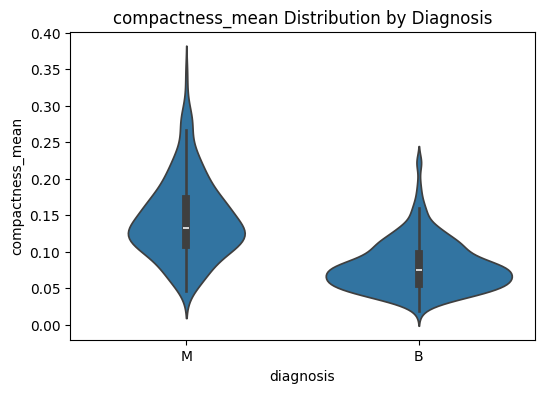

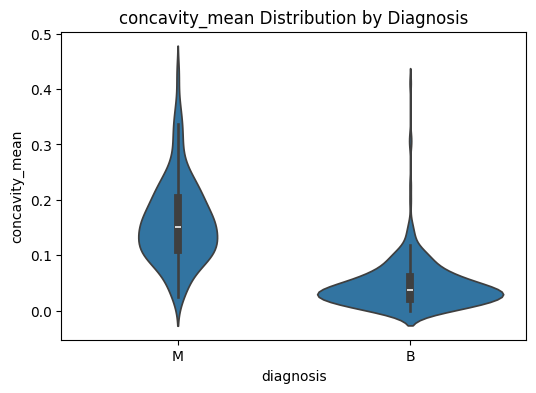

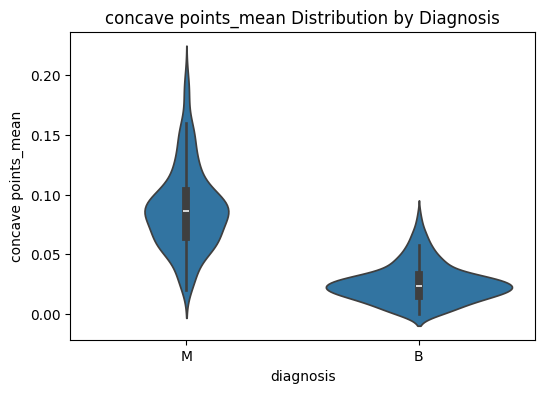

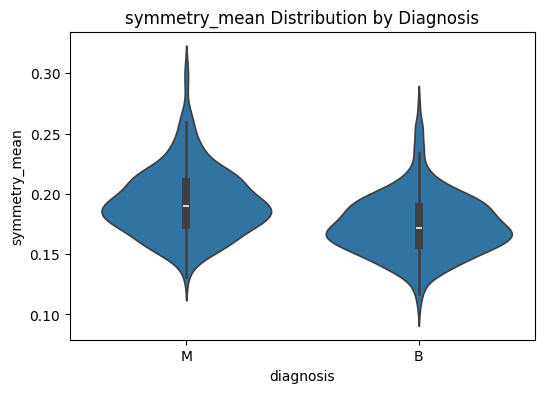

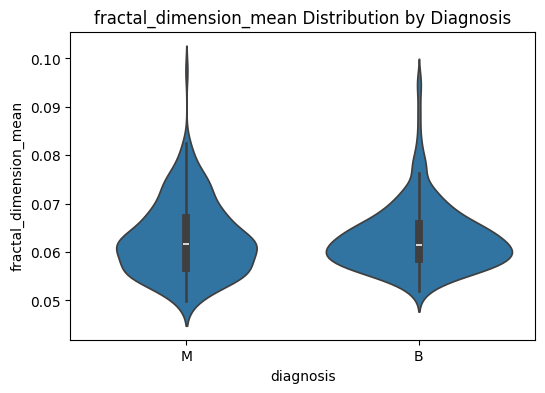

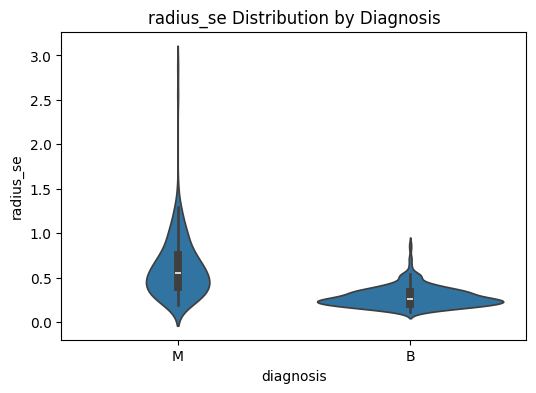

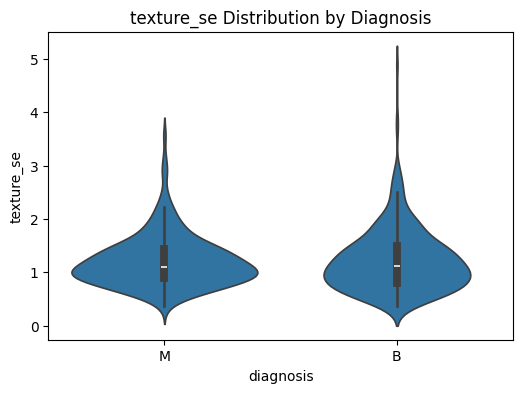

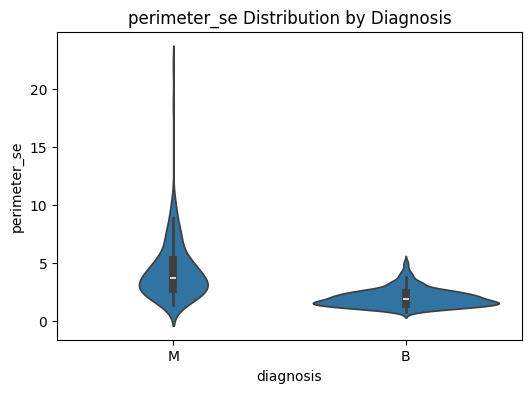

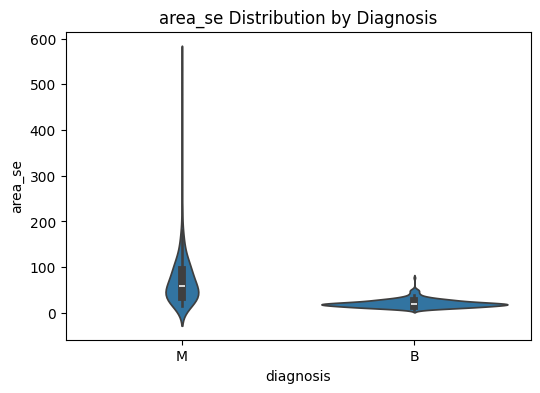

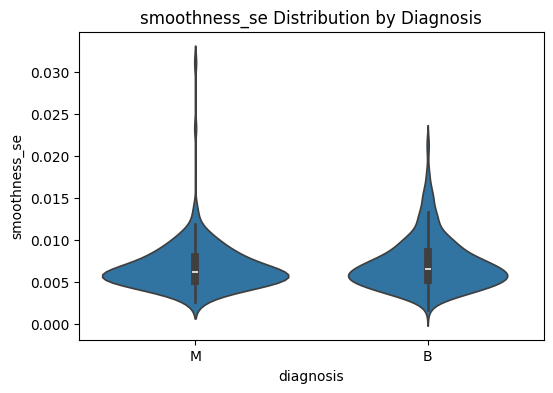

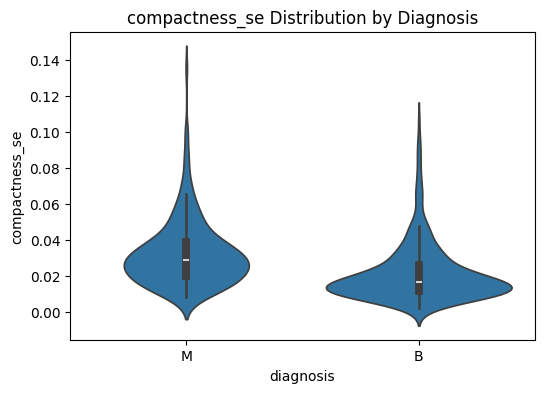

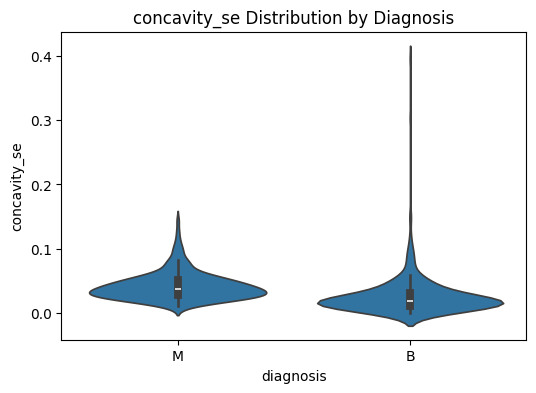

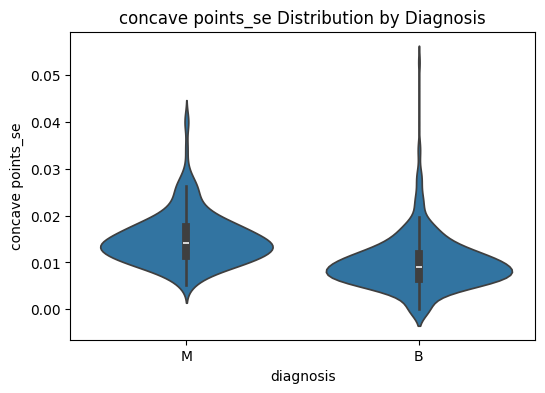

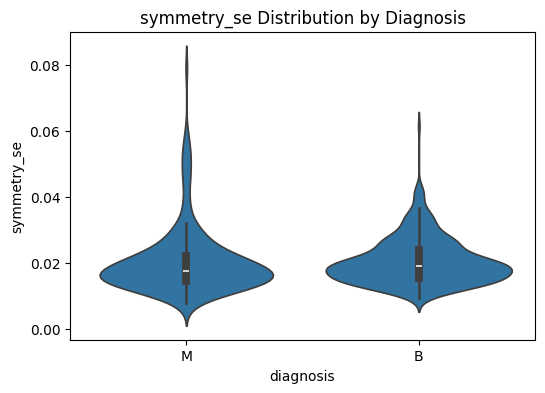

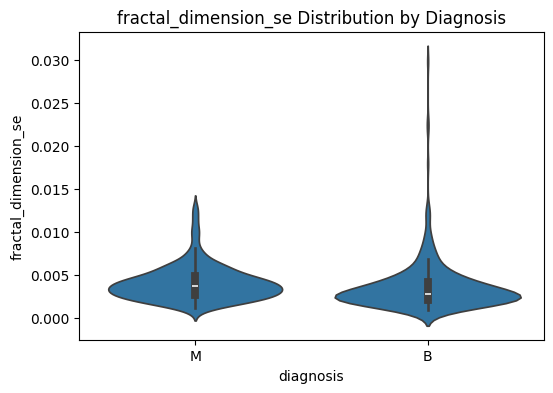

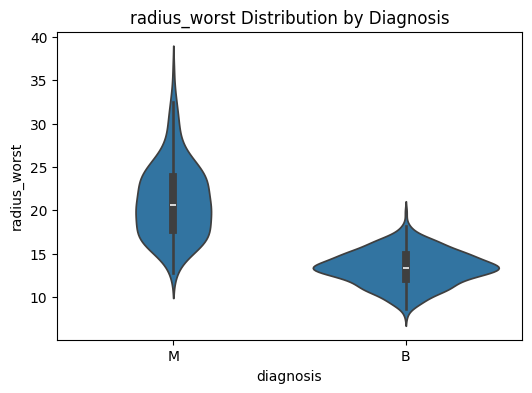

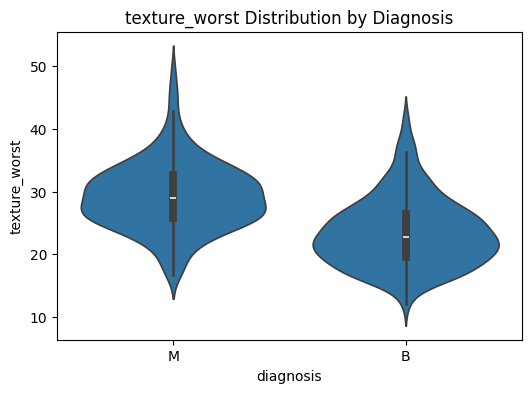

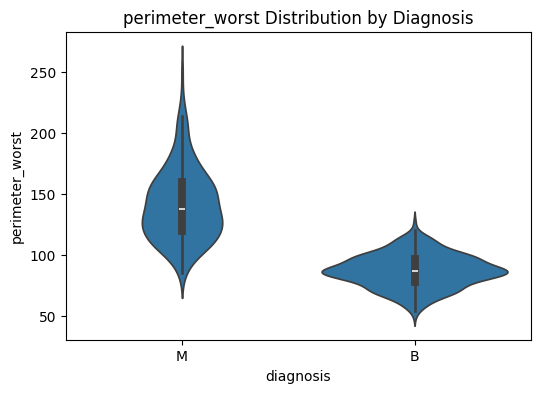

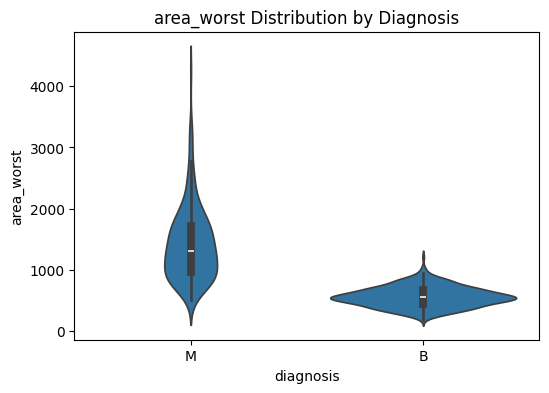

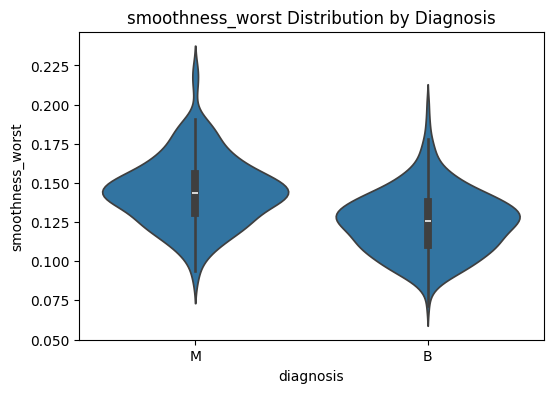

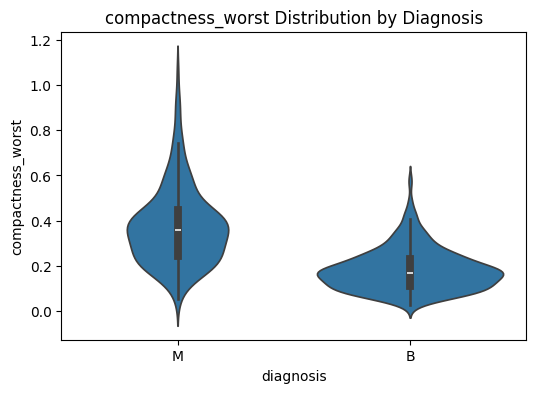

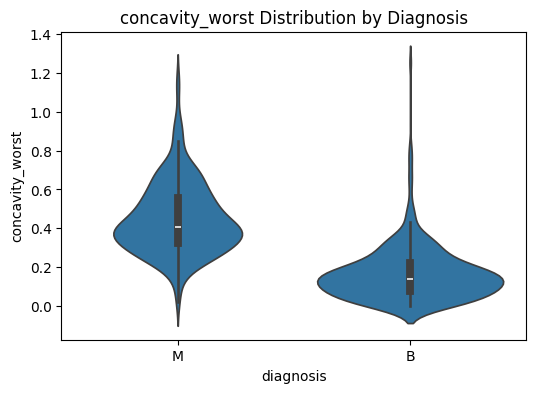

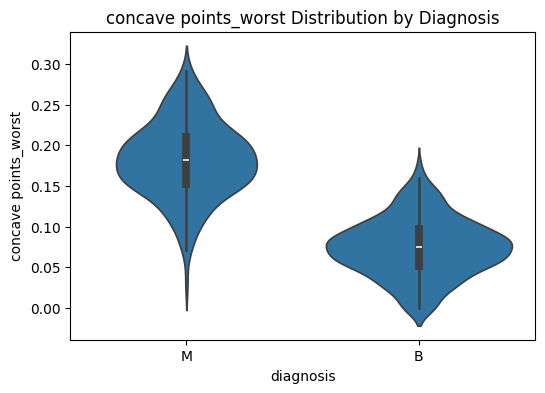

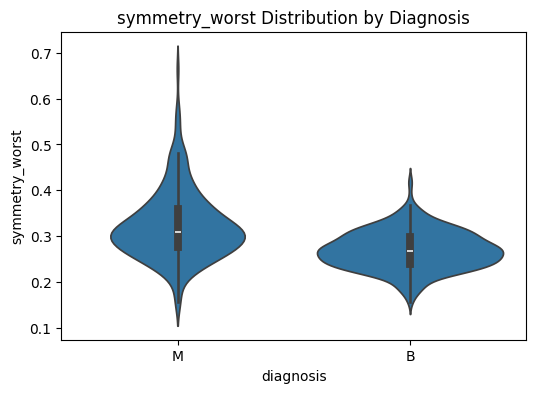

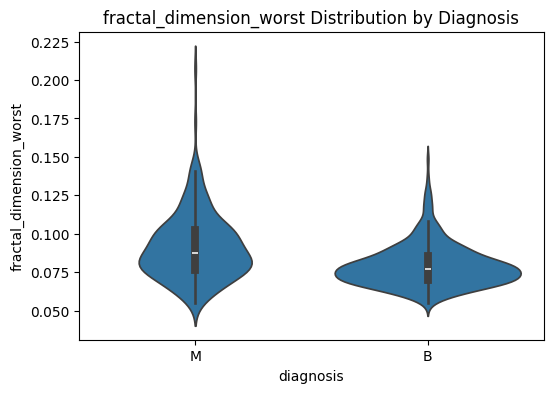

In [58]:
for var in data.columns:
    plt.figure(figsize = (6, 4))
    sns.violinplot(x = "diagnosis", y = var, data = data)
    plt.title(f"{var} Distribution by Diagnosis")
    plt.show()

In [59]:
data1 = data.drop("diagnosis", axis = 1)

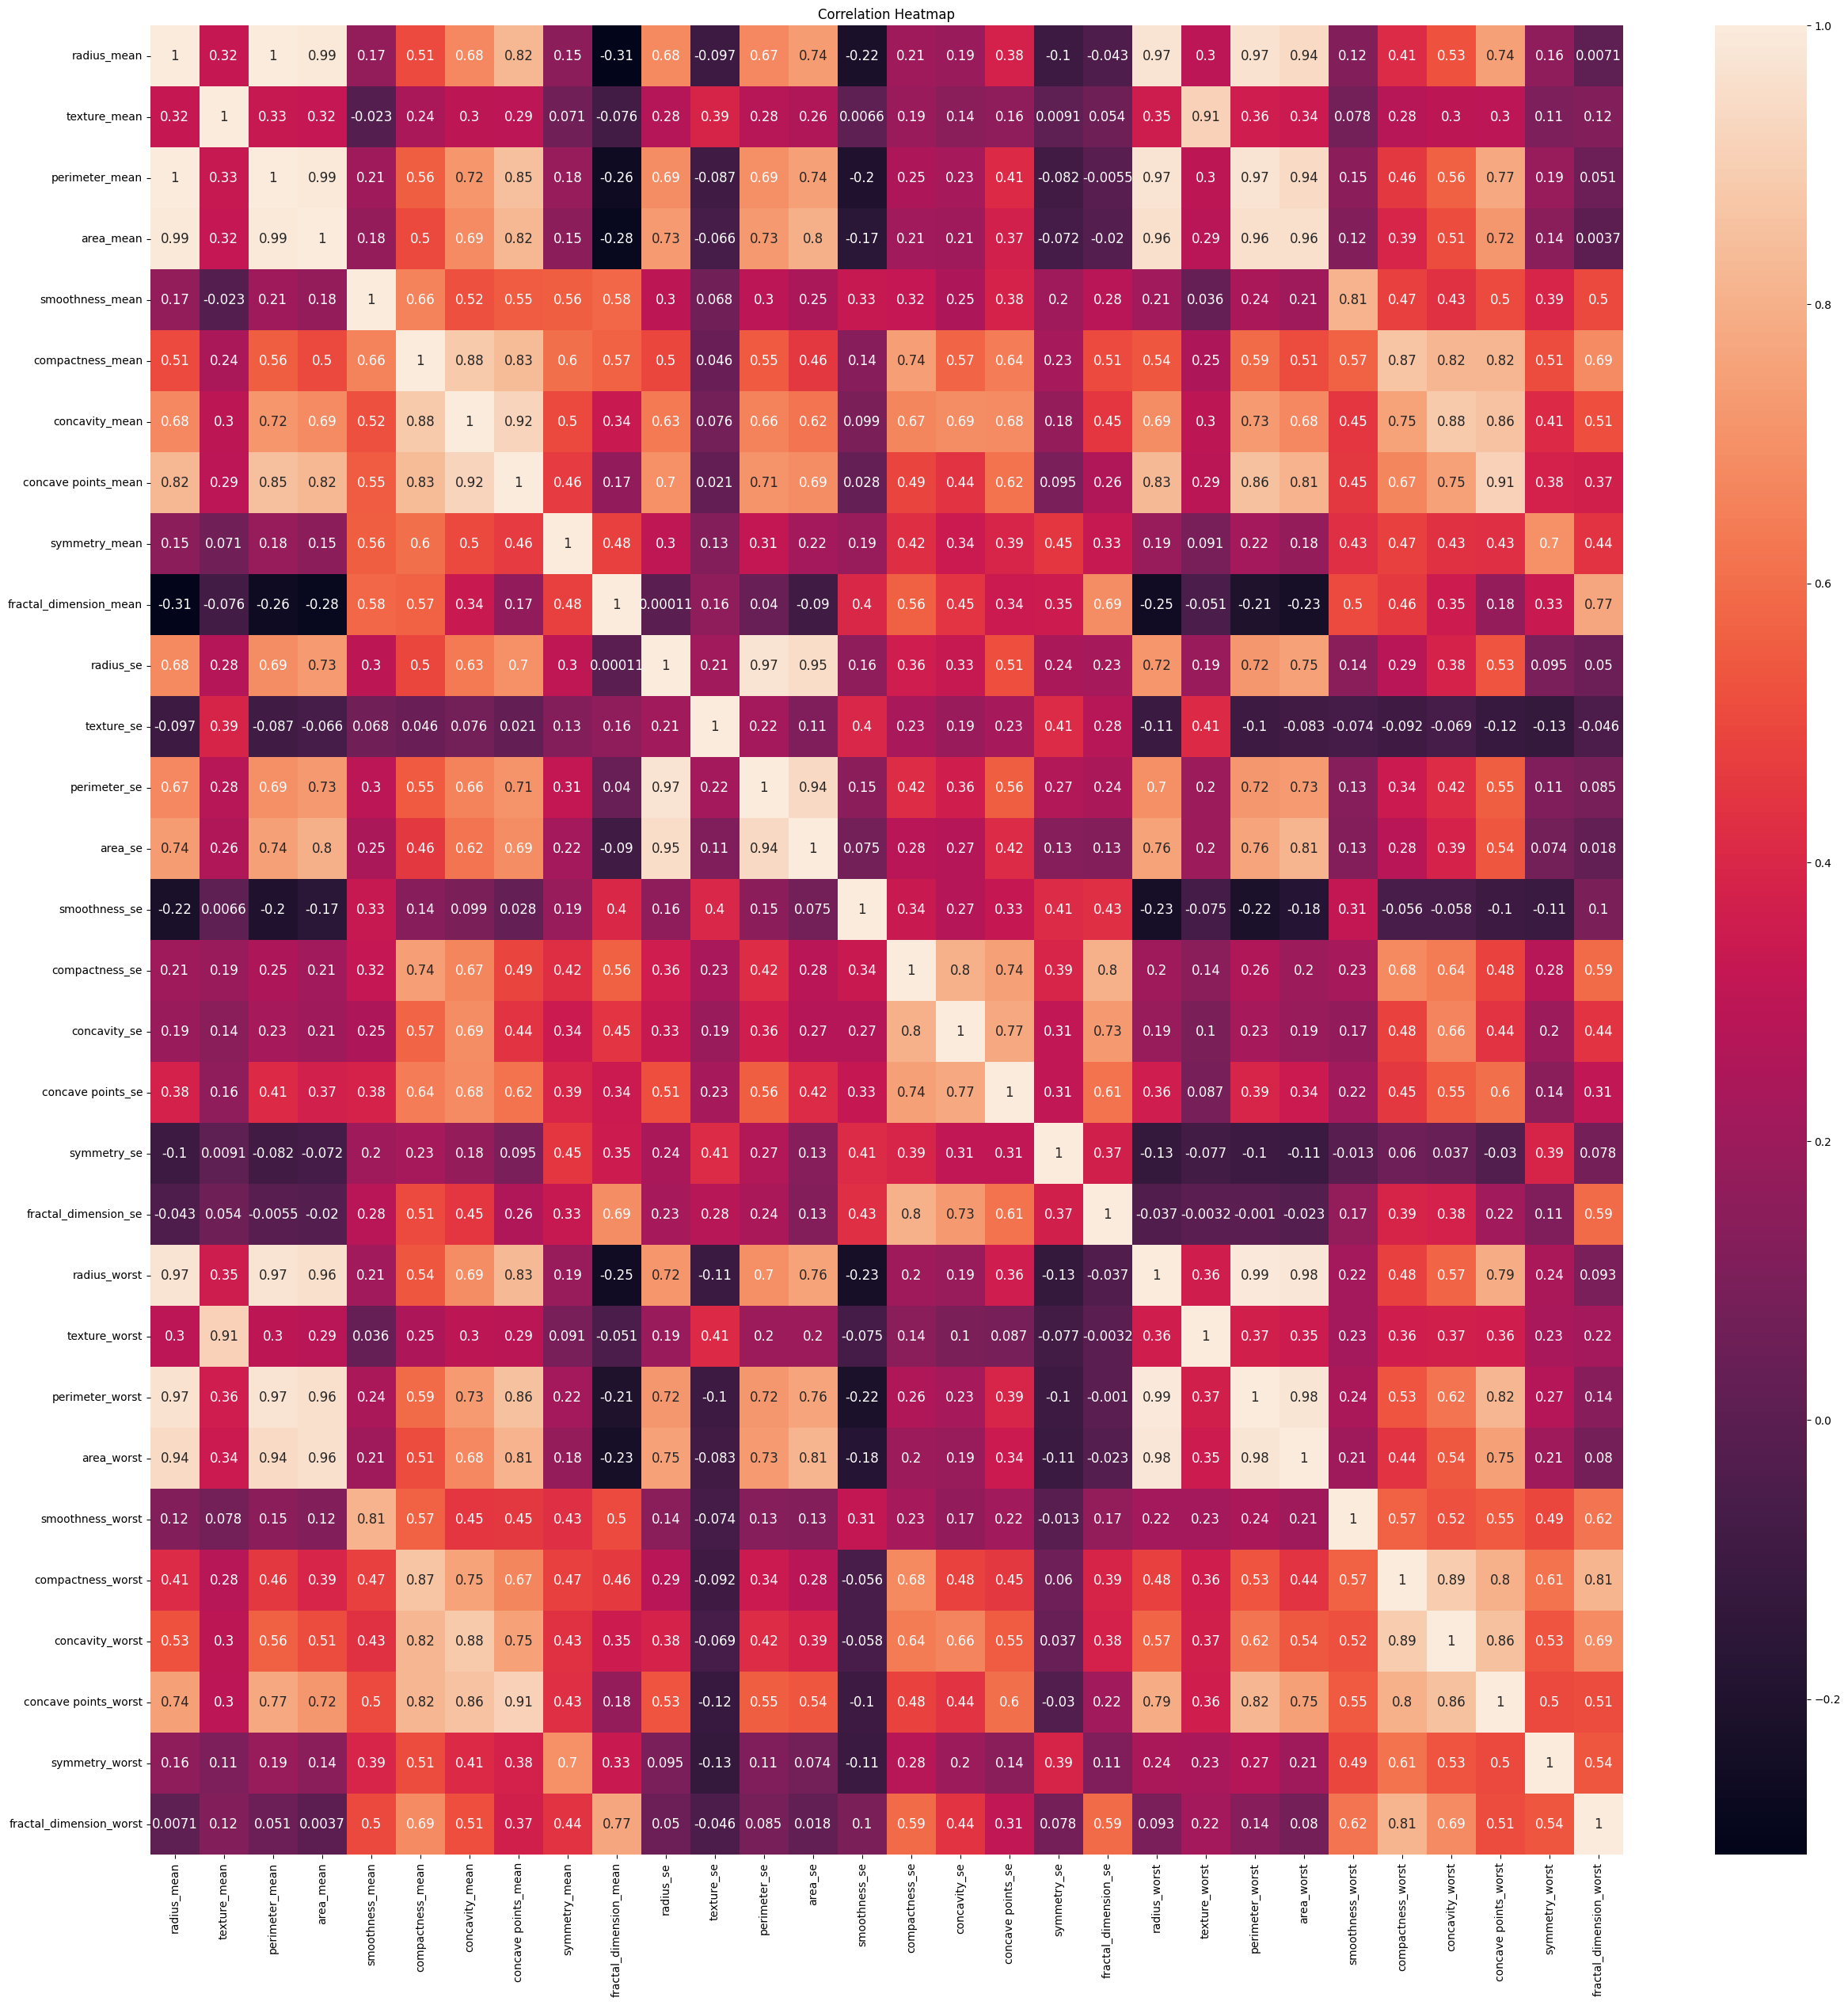

In [60]:
correlation = data1.corr()
plt.figure(figsize = (30, 30))
sns.heatmap(correlation, annot = True, annot_kws = {"size" : 12})
plt.title("Correlation Heatmap")
plt.tick_params(labelsize = 10)
plt.show()

# Data Relationship

Check Relationship Between Indipendent and Target Variable

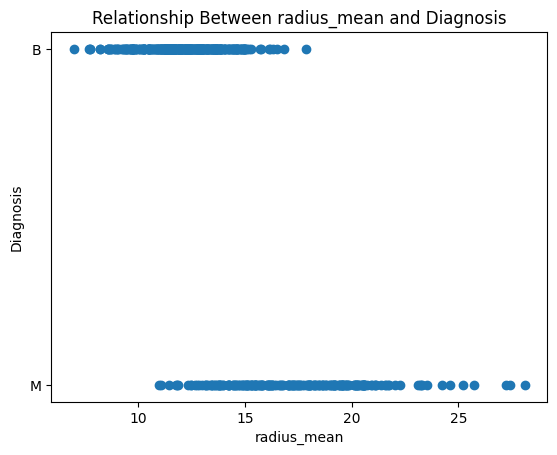

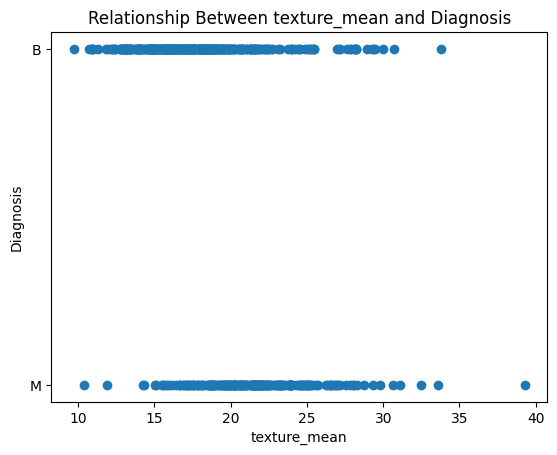

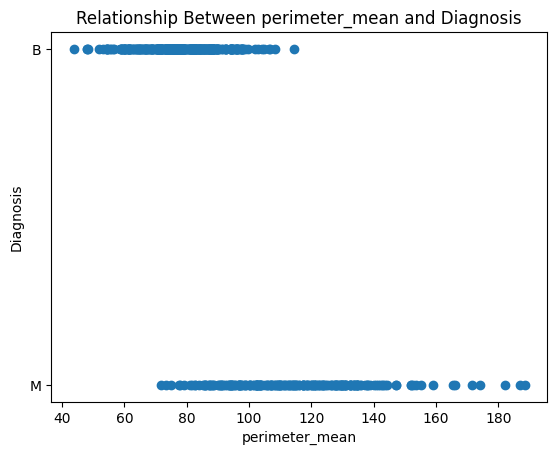

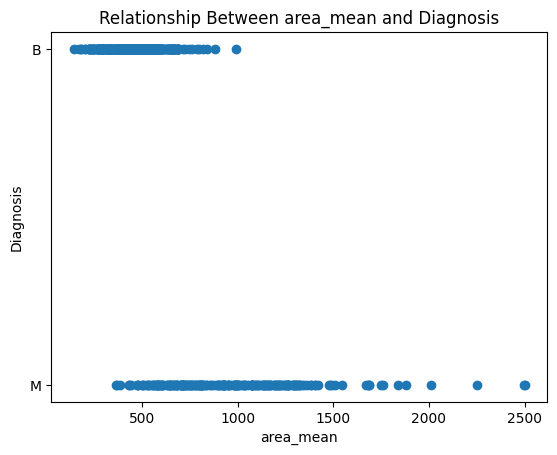

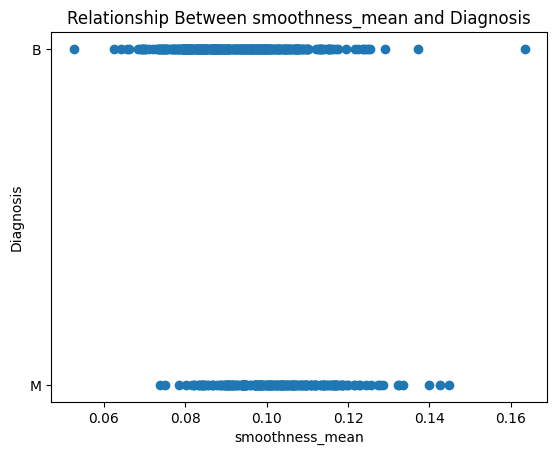

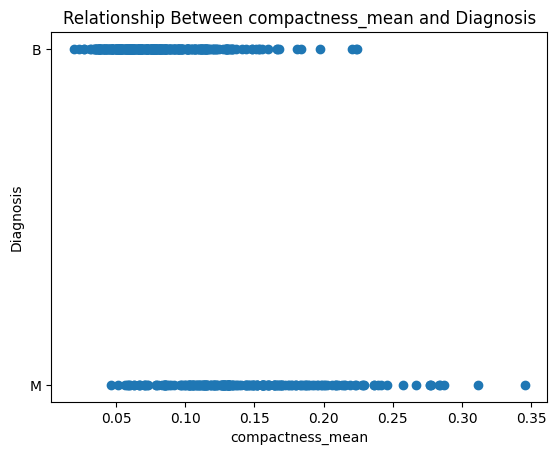

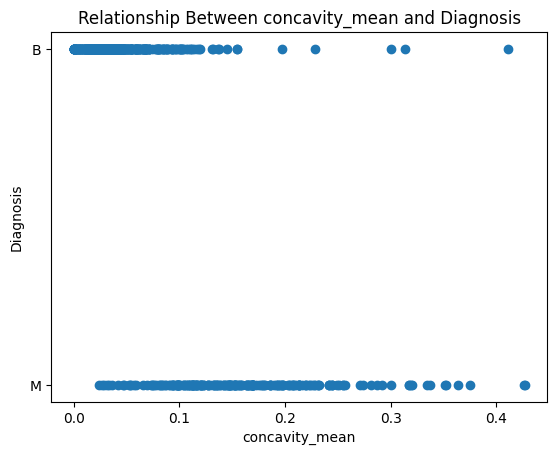

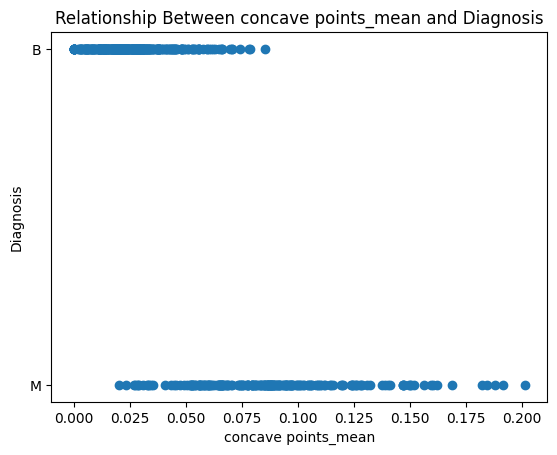

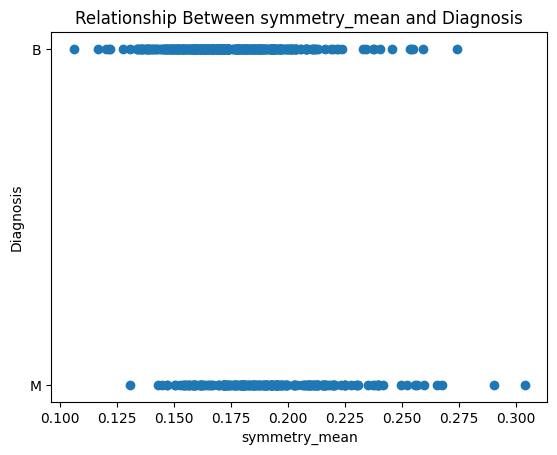

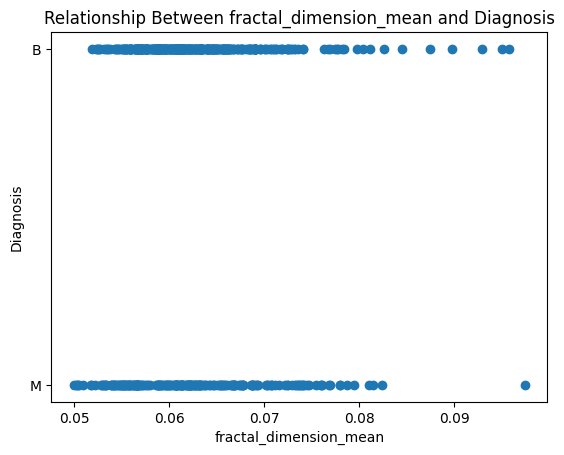

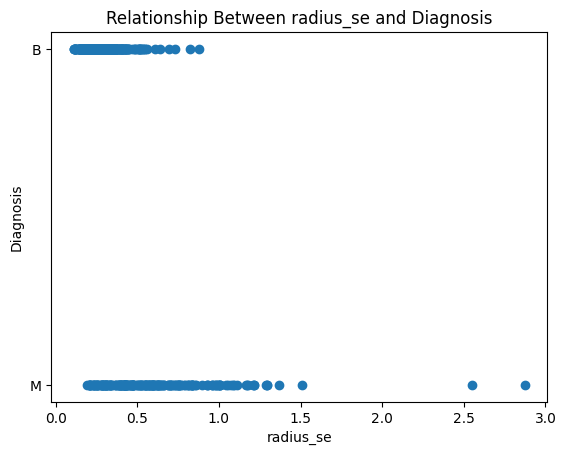

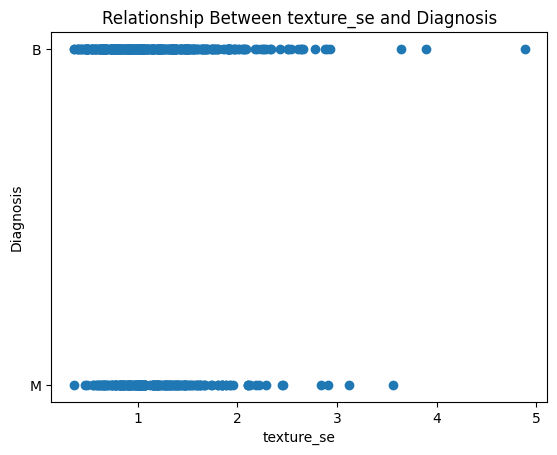

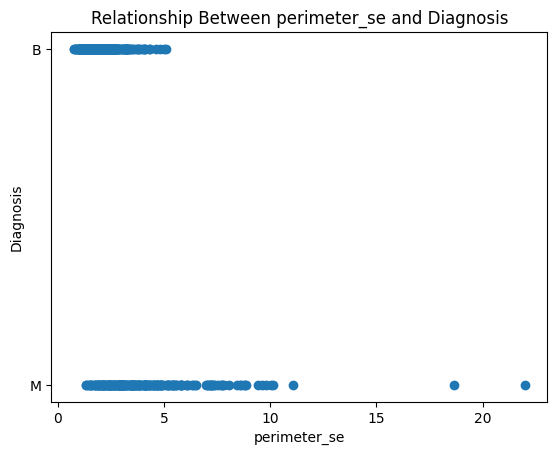

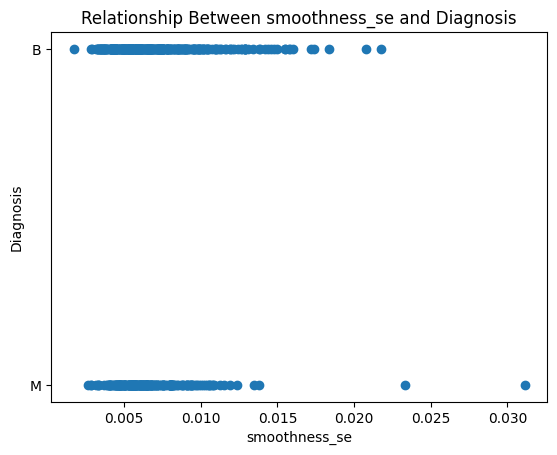

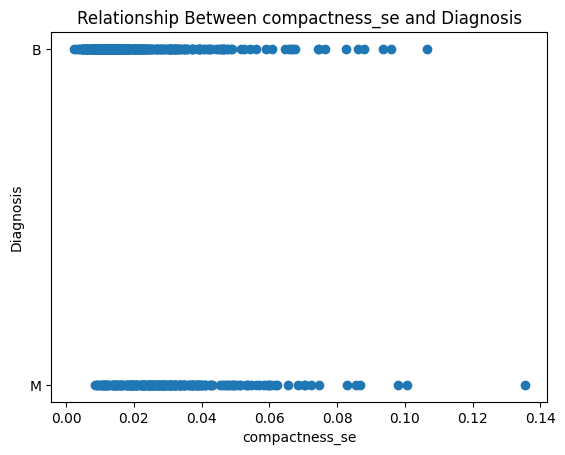

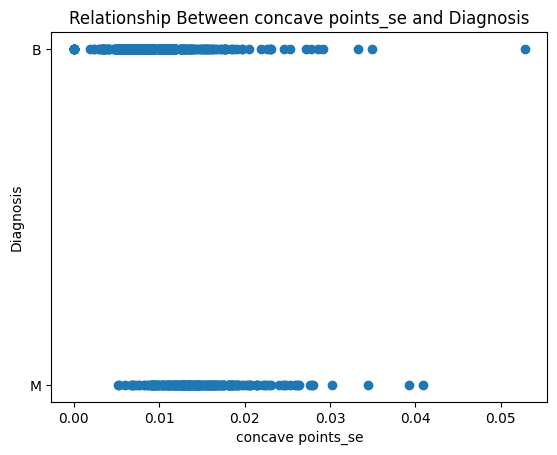

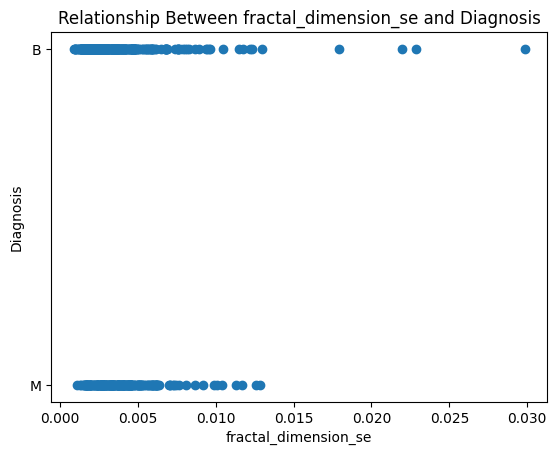

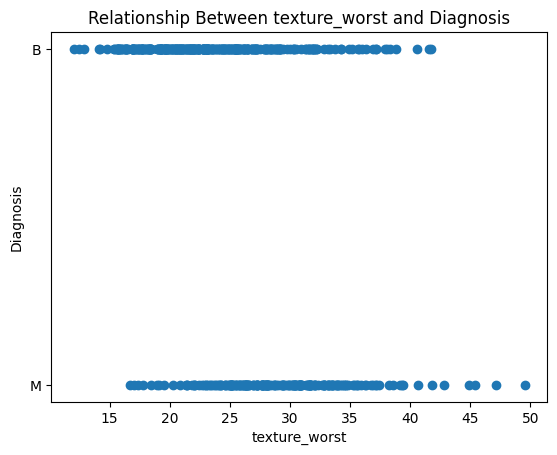

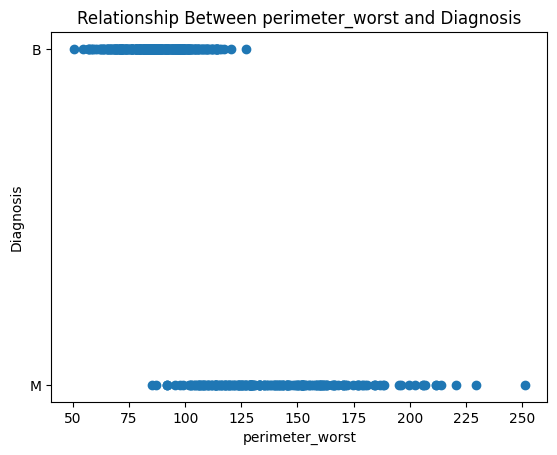

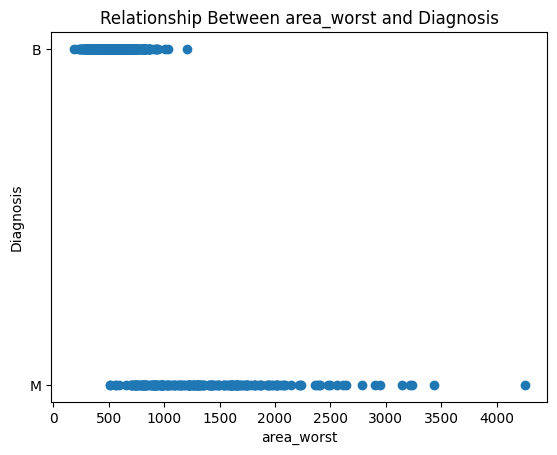

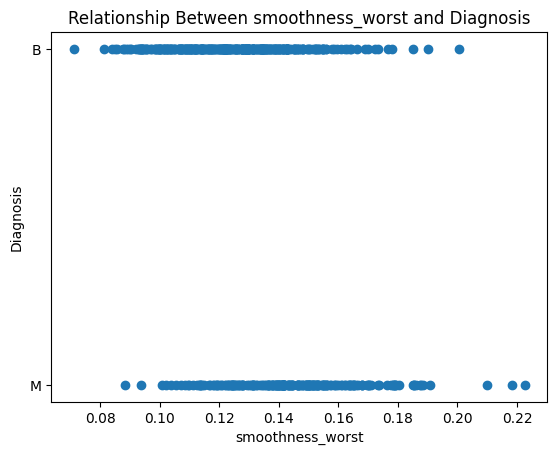

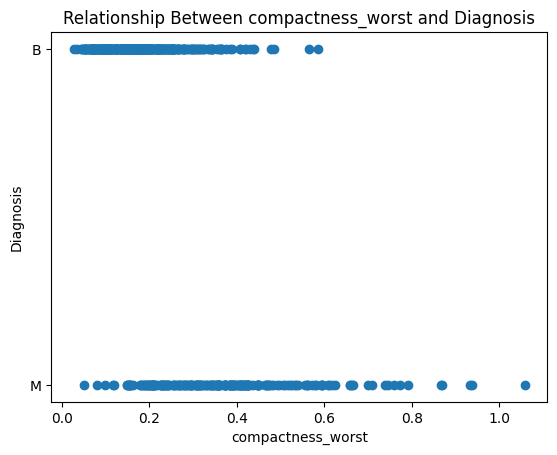

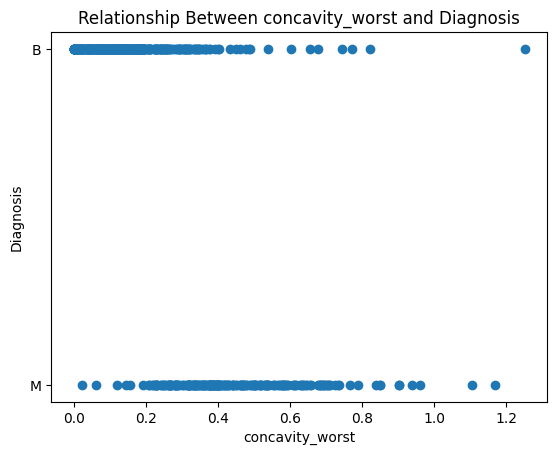

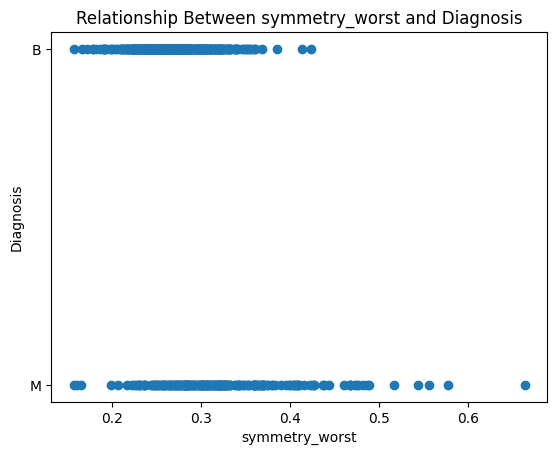

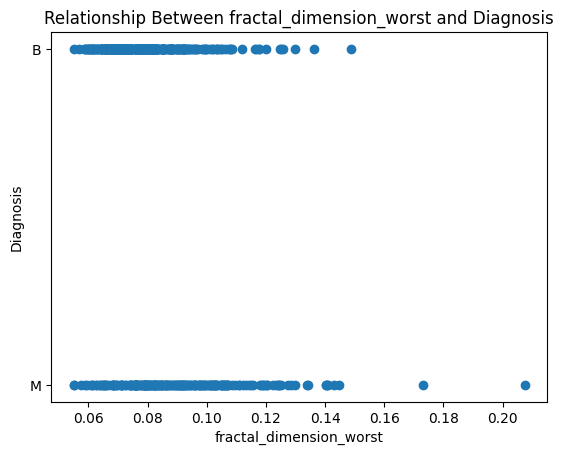

In [65]:
for col in data1:
    plt.scatter(x = data1[col], y = data["diagnosis"])
    plt.title(f"Relationship Between {col} and Diagnosis")
    plt.xlabel(col)
    plt.ylabel("Diagnosis")
    plt.show()
    

# Load Tool

In [86]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

Firstly, we have to perform encoding on Categorical columns

In [69]:
encoder = LabelEncoder()
data["diagnosis"] = encoder.fit_transform(data["diagnosis"])

In [71]:
x = data.drop("diagnosis", axis = 1)
y = data["diagnosis"]

splittin the data into Training and testing Data

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

scalling X_train and X_test 

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Fitting the Data into the model

In [74]:
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

# Model Evaluation

In [75]:
y_pred = model.predict(X_test)

Creating a new DataFrame with actual values and predicted values to find bias, i.e., difference between the two.

In [79]:
evaluation = pd.DataFrame({
    "Actual Value" : y_test,
    "Predicted Value" : y_pred,
    "Error" : y_test- y_pred
})
evaluation

Actual Value  Predicted Value  Error
204             0                0      0
70              1                1      0
131             1                1      0
431             0                0      0
540             0                0      0
..            ...              ...    ...
486             0                0      0
75              1                1      0
249             0                0      0
238             0                0      0
265             1                1      0

[114 rows x 3 columns]

Calculating Mean Squared Error and r2_score to evaluate the model.

In [82]:
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Mean Squarred Error",mse)
accuracy

Mean Squarred Error 0.017543859649122806


0.9824561403508771

In [89]:
confusion_matrics = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrics, annot = True, fmt = "d", color = "blue")
plt.show()

save the model

In [90]:
import joblib
joblib.dump(model, "model.joblib")

['model.joblib']